In [1]:
import astropy.io.fits as fits
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import treecorr
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
# Load only necessary columns from the galaxy shape catalogue
shape_cat_path = '/n17data/mkilbing/astro/data/CFIS/v1.x/ShapePipe/v1.5.x/v1.5.3/unions_shapepipe_cut_struc_2024_v1.5.3.fits'
shapes = fits.open(shape_cat_path)[1].data


In [3]:
desi_lrg_ngc = fits.open('/home/murray/desi_data/LRG_NGC_clustering.dat.fits')[1].data
desi_lrg_sgc = fits.open('/home/murray/desi_data/LRG_SGC_clustering.dat.fits')[1].data

In [4]:
desi_lrg_ngc

FITS_rec([(39627540901396844, 0.42060841, 1, 159.30684159, -10.15575764, 'S', 0.8794835 , 1.        , 0.99309701, 0.60416787, 1., 0.00027236, 0.26855746),
          (39627546836338876, 0.86689807, 1, 158.44667596,  -9.96276007, 'S', 0.8794835 , 1.00652099, 0.9296006 , 0.5692266 , 1., 0.00023934, 0.2946921 ),
          (39627546840531340, 0.93481721, 1, 158.47992947,  -9.88034317, 'S', 0.8794835 , 1.0036217 , 0.9296006 , 0.56758694, 1., 0.00016315, 0.38001019),
          ...,
          (39627762931077110, 0.44630804, 4, 140.94244063,  -1.10633121, 'S', 1.        , 1.03109789, 1.        , 0.9635472 , 1., 0.00048876, 0.16984725),
          (39627829561787298, 0.48930187, 6, 152.29493745,   1.70821846, 'S', 0.98360656, 1.0022738 , 1.        , 0.98048871, 1., 0.00050261, 0.16594458),
          (39627829637285619, 0.75119462, 4, 156.84120502,   1.72823851, 'S', 1.        , 1.        , 1.        , 0.93448663, 1., 0.00048716, 0.17031201)],
         dtype=(numpy.record, [('TARGETID', '>i8'), ('

In [5]:
len( desi_lrg_ngc ) , len( desi_lrg_sgc )

(1476135, 662492)

In [6]:
# Combine the DESI north and south galaxy catalogues
galaxies = np.concatenate((desi_lrg_ngc, desi_lrg_sgc))

# Check the length of the combined catalogue
len(galaxies)

2138627

In [7]:
recon_desi_lrg_ngc = fits.open('/n17data/murray/desi_data/recon_LRG_NGC_clustering.dat.fits')[1].data
recon_desi_lrg_sgc = fits.open('/n17data/murray/desi_data/recon_LRG_SGC_clustering.dat.fits')[1].data

In [8]:
# Combine the DESI north and south galaxy catalogues
recon_galaxies = np.concatenate((recon_desi_lrg_ngc, recon_desi_lrg_sgc))

# Check the length of the combined catalogue
len(recon_galaxies)

2138627

In [9]:

randoms_ngc = fits.open('/n17data/murray/desi_data/LRG_NGC_0_clustering.ran.fits')[1].data
randoms_sgc = fits.open('/n17data/murray/desi_data/LRG_SGC_0_clustering.ran.fits')[1].data

In [10]:
# Combine the DESI north and south galaxy catalogues
randoms = np.concatenate((randoms_ngc, randoms_sgc))

# Check the length of the combined catalogue
len(randoms)

14349309

In [11]:

recon_randoms_ngc = fits.open('/n17data/murray/desi_data/recon_LRG_NGC_0_clustering.ran.fits')[1].data
recon_randoms_sgc = fits.open('/n17data/murray/desi_data/recon_LRG_SGC_0_clustering.ran.fits')[1].data

# Combine the DESI north and south galaxy catalogues
recon_randoms = np.concatenate((recon_randoms_ngc, recon_randoms_sgc))

# Check the length of the combined catalogue
len(recon_randoms)

14349309

In [12]:
# Create SkyCoord objects for matching
galaxy_coords = coord.SkyCoord(ra=galaxies['RA']*u.degree, dec=galaxies['DEC']*u.degree)
shape_coords = coord.SkyCoord(ra=shapes['RA']*u.degree, dec=shapes['Dec']*u.degree)

# Perform the matching
idx, d2d, d3d = galaxy_coords.match_to_catalog_sky(shape_coords)

In [13]:
# Apply a maximum separation criterion (e.g., 1 arcsecond)
max_sep = 1 * u.arcsec
matches = d2d < max_sep

In [14]:
temp_max = 50
theta_bins = np.linspace( 0 , temp_max , 100 )
theta_cents = ( theta_bins[1:] + theta_bins[:-1] )/2.
counts, _ = np.histogram( d2d.arcsec[ d2d.arcsec < temp_max ] , bins = theta_bins )

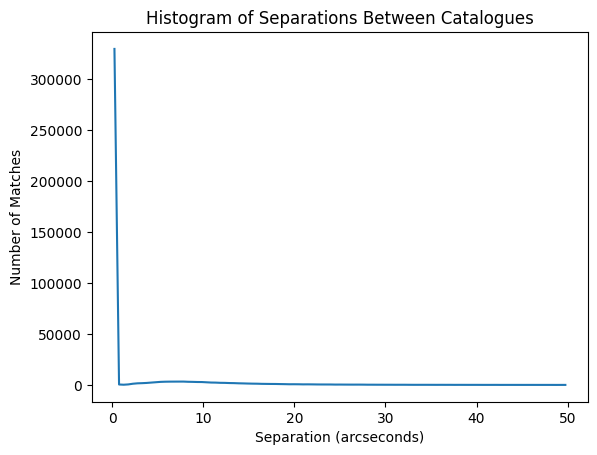

In [15]:
# Plot the histogram
plt.plot( theta_cents , counts )
plt.xlabel('Separation (arcseconds)')
plt.ylabel('Number of Matches')
plt.title('Histogram of Separations Between Catalogues')
plt.show()

In [16]:
len( galaxies['RA'][matches] )

329819

In [17]:
# Filter the matched catalogues
matched_galaxy_ra = galaxies['RA'][matches]
matched_galaxy_dec = galaxies['DEC'][matches]
matched_galaxy_redshift = galaxies['Z'][matches]
matched_shape_ra = shapes['RA'][idx[matches]]
matched_shape_dec = shapes['Dec'][idx[matches]]
matched_shape_e1 = shapes['e1'][idx[matches]]
matched_shape_e2 = shapes['e2'][idx[matches]]
matched_shape_w = shapes['w_iv'][idx[matches]]

In [18]:
# Filter the matched catalogues
recon_matched_galaxy_ra = recon_galaxies['RA'][matches]
recon_matched_galaxy_dec = recon_galaxies['DEC'][matches]
recon_matched_galaxy_redshift = recon_galaxies['Z'][matches]
recon_matched_shape_ra = shapes['RA'][idx[matches]]
recon_matched_shape_dec = shapes['Dec'][idx[matches]]
recon_matched_shape_e1 = shapes['e1'][idx[matches]]
recon_matched_shape_e2 = shapes['e2'][idx[matches]]
recon_matched_shape_w = shapes['w_iv'][idx[matches]]

In [19]:
# Create a new FITS table with the matched columns
cols = [
    fits.Column(name='RA', format='E', array=matched_galaxy_ra),
    fits.Column(name='Dec', format='E', array=matched_galaxy_dec),
    fits.Column(name='e1', format='E', array=matched_shape_e1),
    fits.Column(name='e2', format='E', array=matched_shape_e2),
    fits.Column(name='w_iv', format='E', array=matched_shape_w),
    fits.Column(name='galaxy_RA', format='E', array=matched_galaxy_ra),
    fits.Column(name='galaxy_Dec', format='E', array=matched_galaxy_dec),
    fits.Column(name='redshift', format='E', array=matched_galaxy_redshift)
]

hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('unions_desi_lrg_catalogue.fits', overwrite=True)

In [20]:
# Create a new FITS table with the matched columns
cols = [
    fits.Column(name='RA', format='E', array=recon_matched_galaxy_ra),
    fits.Column(name='Dec', format='E', array=recon_matched_galaxy_dec),
    fits.Column(name='e1', format='E', array=recon_matched_shape_e1),
    fits.Column(name='e2', format='E', array=recon_matched_shape_e2),
    fits.Column(name='w_iv', format='E', array=recon_matched_shape_w),
    fits.Column(name='galaxy_RA', format='E', array=recon_matched_galaxy_ra),
    fits.Column(name='galaxy_Dec', format='E', array=recon_matched_galaxy_dec),
    fits.Column(name='redshift', format='E', array=recon_matched_galaxy_redshift)
]

hdu = fits.BinTableHDU.from_columns(cols)
hdu.writeto('unions_recon_desi_lrg_catalogue.fits', overwrite=True)

In [12]:
shape_position_catalogue = fits.open('unions_desi_lrg_catalogue.fits')[1].data
shape_position_catalogue = fits.open('~/intrinsic_alignments/data/unions_desi_lrg_catalogue.fits')[1].data
len( shape_position_catalogue )

329819

In [13]:
shape_position_recon_catalogue = fits.open('unions_recon_desi_lrg_catalogue.fits')[1].data
len( shape_position_recon_catalogue )

329819

In [14]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM( 70 , 0.3 )

In [15]:
ra = 'Ra'
dec = 'DEC'
redshift = 'redshift'

In [16]:
import healpy as hp

In [606]:
# remove random shapes and positions outside of the survey footprints
# Convert RA, Dec to HEALPix pixel indices
nside = 128
pixels_positions = hp.ang2pix(nside, recon_galaxies['RA'], recon_galaxies['DEC'] , lonlat=True)
pixels_shapes = hp.ang2pix(nside,  shape_position_catalogue[ra], shape_position_catalogue[dec] , lonlat=True)
#pixels_unions_shapes = hp.ang2pix(nside,  shapes['Ra'], shapes['Dec'] , lonlat=True)
pixels_random_positions = hp.ang2pix(nside,  randoms['RA'], randoms['DEC'] , lonlat=True)

# Create HEALPix count maps
position_map = np.bincount(pixels_positions, minlength=hp.nside2npix(nside))
shape_map = np.bincount(pixels_shapes, minlength=hp.nside2npix(nside))
#unions_shape_map = np.bincount(pixels_unions_shapes, minlength=hp.nside2npix(nside))
random_position_map = np.bincount(pixels_random_positions, minlength=hp.nside2npix(nside))

# Create a mask: pixels with at least one object
position_mask = (position_map > 0) 
shape_mask = (shape_map>0) 

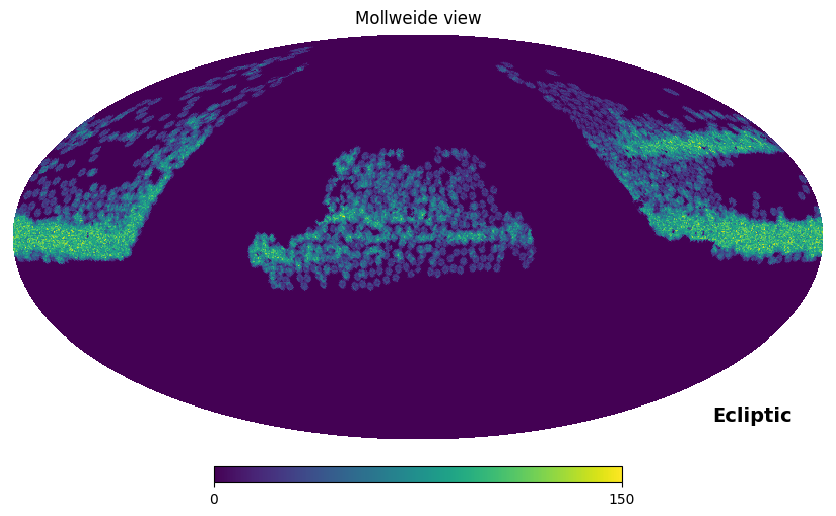

In [607]:
hp.mollview( position_map , coord ='E' )

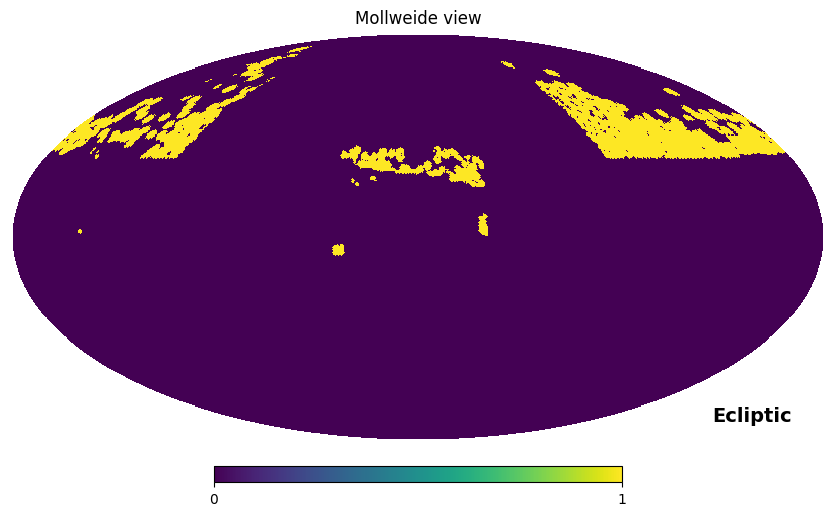

In [19]:
hp.mollview( shape_mask , coord ='E' )

In [20]:
# hp.mollview( unions_shape_map, coord ='E' )

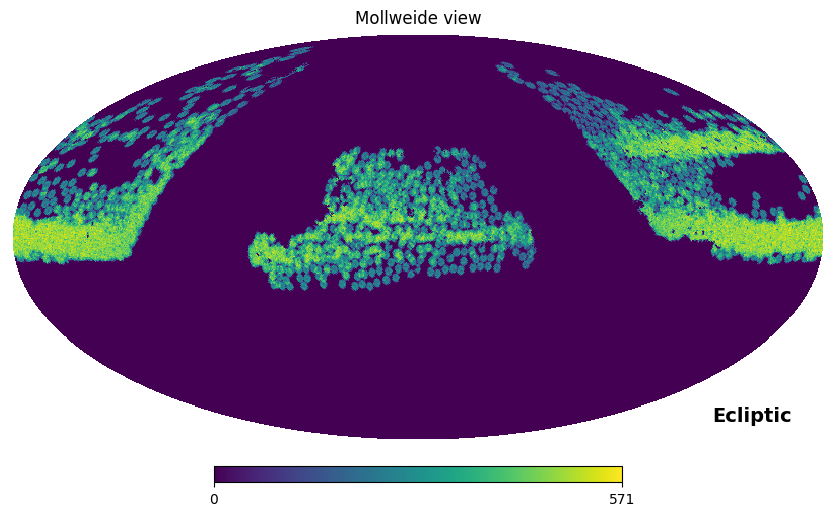

In [21]:
hp.mollview( random_position_map , coord ='E' )

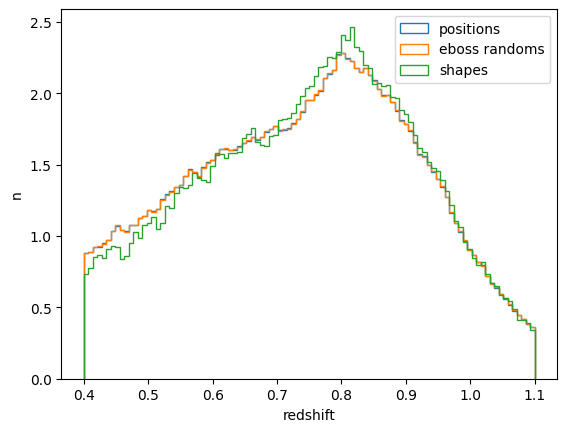

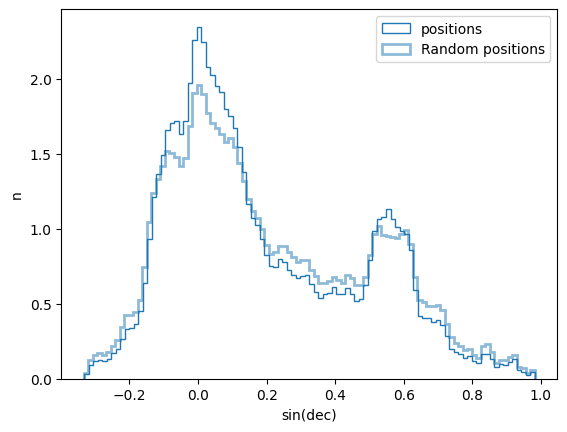

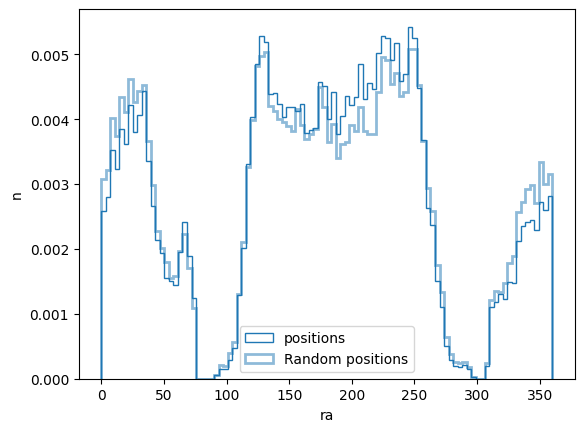

In [22]:
plt.figure()
plt.hist( galaxies['Z'] ,100,histtype='step',density=True,label='positions')
plt.hist( randoms['Z'] ,100,histtype='step',density=True,label='eboss randoms')
plt.hist( shape_position_catalogue['redshift'],100,histtype='step',density=True,label='shapes')
# plt.hist(random_positions[redshift],100,histtype='step',density=True,label='Random positions',lw=2,alpha=0.5,color='C0')
# plt.hist(random_shapes[redshift],100,histtype='step',density=True,label='Random shapes',lw=2,alpha=0.5,color='C1')
plt.xlabel('redshift')
plt.ylabel('n')
plt.legend()


plt.figure()
plt.hist(np.sin(np.deg2rad(galaxies['DEC'])),100,histtype='step',density=True,label='positions')
#plt.hist(np.sin(np.deg2rad(shape_position_catalogue['Dec'])),100,histtype='step',density=True,label='shapes')
plt.hist(np.sin(np.deg2rad(randoms['DEC'])),100,histtype='step',density=True,label='Random positions',lw=2,alpha=0.5,color='C0')
plt.xlabel('sin(dec)')
plt.ylabel('n')
plt.legend()

plt.figure()
plt.hist(galaxies['RA'],100,histtype='step',density=True,label='positions')
#plt.hist(shape_position_catalogue['RA'],100,histtype='step',density=True,label='shapes')
plt.hist(randoms['RA'],100,histtype='step',density=True,label='Random positions',lw=2,alpha=0.5,color='C0')
plt.xlabel('ra')
plt.ylabel('n')
plt.legend()

In [23]:
import pandas as pd

In [24]:
galaxies

array([(39627540901396844, 0.42060841, 1, 159.30684159, -10.15575764, b'S', 0.8794835 , 1.        , 0.99309701, 0.60416787, 1., 0.00027236, 0.26855746),
       (39627546836338876, 0.86689807, 1, 158.44667596,  -9.96276007, b'S', 0.8794835 , 1.00652099, 0.9296006 , 0.5692266 , 1., 0.00023934, 0.2946921 ),
       (39627546840531340, 0.93481721, 1, 158.47992947,  -9.88034317, b'S', 0.8794835 , 1.0036217 , 0.9296006 , 0.56758694, 1., 0.00016315, 0.38001019),
       ...,
       (39637336077634618, 0.67579681, 1, 350.97604931,  32.67718598, b'S', 0.83991791, 1.        , 0.98047513, 0.59699747, 1., 0.00026224, 0.27605767),
       (39637336077634684, 0.80120072, 1, 350.97877448,  32.64172822, b'S', 0.83991791, 1.00243032, 1.04820466, 0.63978815, 1., 0.00028889, 0.25714424),
       (39637336077634980, 0.40798328, 1, 350.99205648,  32.79116538, b'S', 0.83991791, 1.        , 0.98282915, 0.59843081, 1., 0.00028199, 0.26178364)],
      dtype=[('TARGETID', '<i8'), ('Z', '<f8'), ('NTILE', '<i8'), ('R

In [25]:
# Extract only 1D columns from the galaxy sample
columns_to_use = ['RA', 'DEC', 'Z',  'WEIGHT']
positions = pd.DataFrame({col: galaxies[col] for col in columns_to_use})

In [26]:
recon_positions = pd.DataFrame({col: recon_galaxies[col] for col in columns_to_use})

In [27]:
# Create the DataFrame
shapes = pd.DataFrame.from_records( shape_position_catalogue )

In [28]:
recon_shapes = pd.DataFrame.from_records( shape_position_recon_catalogue )

In [29]:
random_positions = pd.DataFrame.from_records( randoms )

In [30]:
recon_random_positions = pd.DataFrame.from_records( recon_randoms )

In [31]:
positions.shape, shapes.shape, random_positions.shape

((2138627, 4), (329819, 8), (14349309, 14))

In [32]:
recon_positions.shape, recon_shapes.shape, recon_random_positions.shape

((2138627, 4), (329819, 8), (14349309, 5))

In [33]:
positions[redshift] = positions['Z']
positions['w'] = np.ones( len( positions ))
shapes['w'] = shapes['w_iv']
shapes['DEC'] = shapes['Dec']
random_positions[redshift] = random_positions['Z']


In [34]:
recon_positions[redshift] = recon_positions['Z']
recon_positions['w'] = np.ones( len( recon_positions ))
recon_shapes['w'] = recon_shapes['w_iv']
recon_shapes['DEC'] = recon_shapes['Dec']
recon_random_positions[redshift] = recon_random_positions['Z']

In [35]:
#random_positions = random_positions.iloc[::5].copy()

In [36]:
len( randoms ) / len( recon_shapes )

43.50661726583368

In [37]:
d = 'd'

positions.loc[:,d] = cosmo.comoving_distance(positions[redshift]).value
shapes.loc[:,d]    = cosmo.comoving_distance(shapes[redshift]).value
random_positions[d] = cosmo.comoving_distance(random_positions[redshift]).value

In [194]:
recon_positions.loc[:,d] = cosmo.comoving_distance(recon_positions[redshift]).value


recon_shapes.loc[:,d]    = cosmo.comoving_distance(recon_shapes[redshift]).value

recon_random_positions[d] = cosmo.comoving_distance(recon_random_positions[redshift]).value

In [195]:
np.min( positions['d'])

1551.5473814888533

In [196]:
positions['x'] = positions[d]*np.cos(np.deg2rad(positions['DEC']))*np.cos(np.deg2rad(positions['RA']))
positions['y'] = positions[d]*np.cos(np.deg2rad(positions['DEC']))*np.sin(np.deg2rad(positions['RA']))
positions['z'] = positions[d]*np.sin(np.deg2rad(positions['DEC']))

shapes['x'] = shapes[d]*np.cos(np.deg2rad(shapes['DEC']))*np.cos(np.deg2rad(shapes['RA']))
shapes['y'] = shapes[d]*np.cos(np.deg2rad(shapes['DEC']))*np.sin(np.deg2rad(shapes['RA']))
shapes['z'] = shapes[d]*np.sin(np.deg2rad(shapes['DEC']))

In [197]:
recon_positions['x'] = recon_positions[d]*np.cos(np.deg2rad(recon_positions['DEC']))*np.cos(np.deg2rad(recon_positions['RA']))
recon_positions['y'] = recon_positions[d]*np.cos(np.deg2rad(recon_positions['DEC']))*np.sin(np.deg2rad(recon_positions['RA']))
recon_positions['z'] = recon_positions[d]*np.sin(np.deg2rad(recon_positions['DEC']))

recon_shapes['x'] = recon_shapes[d]*np.cos(np.deg2rad(recon_shapes['DEC']))*np.cos(np.deg2rad(recon_shapes['RA']))
recon_shapes['y'] = recon_shapes[d]*np.cos(np.deg2rad(recon_shapes['DEC']))*np.sin(np.deg2rad(recon_shapes['RA']))
recon_shapes['z'] = recon_shapes[d]*np.sin(np.deg2rad(recon_shapes['DEC']))

In [198]:
shapes['e1'].values

array([ 0.09016676,  0.15732381,  0.22919255, ..., -0.4675666 ,
        0.00742089,  0.14479135], dtype='>f4')

In [199]:
num_nans = shapes['e1'].isna().sum()
print(f"Number of NaNs: {num_nans}")


Number of NaNs: 0


In [200]:
num_nans = shapes['e2'].isna().sum()
print(f"Number of NaNs: {num_nans}")

Number of NaNs: 0


In [201]:
num_nans = shapes['w'].isna().sum()
print(f"Number of NaNs: {num_nans}")

Number of NaNs: 0


In [202]:
position_catalogue = treecorr.Catalog( x=positions['x'], 
                                       y=positions['y'], 
                                       z=positions['z'],
                                       w=positions['w'])
shape_catalogue = treecorr.Catalog( x=shapes['x'], 
                                    y=shapes['y'], 
                                    z=shapes['z'], 
                                    g1 = shapes['e1'],
                                    g2 = shapes['e2'], 
                                    w=shapes['w'])


In [203]:
recon_position_catalogue = treecorr.Catalog( x=recon_positions['x'], 
                                       y=recon_positions['y'], 
                                       z=recon_positions['z'],
                                       w=recon_positions['w'])
recon_shape_catalogue = treecorr.Catalog( x=recon_shapes['x'], 
                                    y=recon_shapes['y'], 
                                    z=recon_shapes['z'], 
                                    g1 = recon_shapes['e1'],
                                    g2 = recon_shapes['e2'], 
                                    w=recon_shapes['w'])

In [204]:
dz_bins = np.linspace( -0.005 , 0.005 , 100 )
dz_cents = ( dz_bins[1:] + dz_bins[:-1] )/2.

dredshift, _ = np.histogram( recon_shapes['redshift'] - shapes['redshift'] , dz_bins )

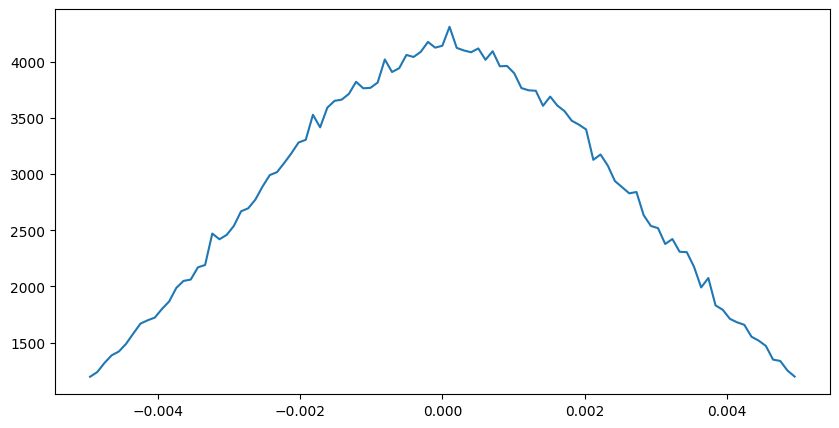

In [205]:
plt.figure( figsize=( 10 , 5 ) )
plt.plot( dz_cents , dredshift )

In [206]:
d_bins = np.linspace( -20 , 20 , 100 )
d_cents = ( d_bins[1:] + d_bins[:-1] )/2.
dx, _ =  np.histogram( recon_shapes['x'] - shapes['x'] , bins = d_bins )
dy, _ =  np.histogram( recon_shapes['y'] - shapes['y'] , bins = d_bins )
dz, _ =  np.histogram( recon_shapes['z'] - shapes['z'] , bins = d_bins )

In [207]:
np.mean( recon_shapes['x'] - shapes['x'] ), np.mean( recon_shapes['y'] - shapes['y'] ), np.mean( recon_shapes['z'] - shapes['z'] )

(0.21997001002062014, -0.13073356413208345, -0.09018311411435762)

In [208]:
np.mean( recon_shapes['x'] - shapes['x'] ), np.mean( recon_shapes['y'] - shapes['y'] ), np.mean( recon_shapes['z'] - shapes['z'] )

(0.21997001002062014, -0.13073356413208345, -0.09018311411435762)

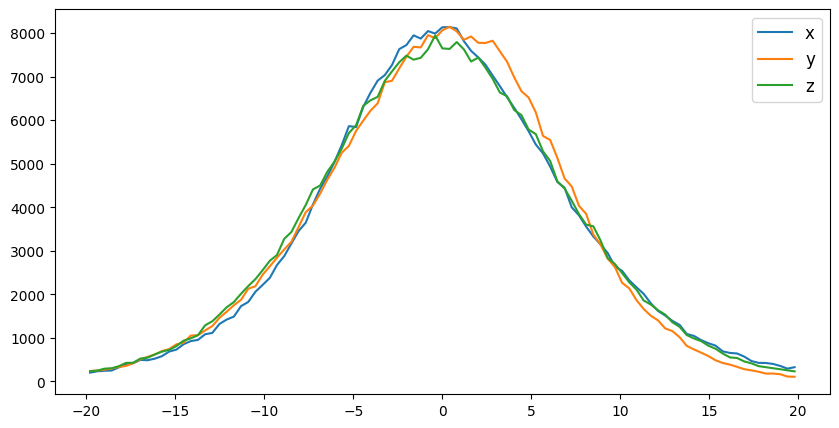

In [209]:
plt.figure( figsize=( 10 , 5 ) )
plt.plot( d_cents , dx , label = 'x' )
plt.plot( d_cents , dy , label = 'y' )      
plt.plot( d_cents , dz , label = 'z' )
plt.legend( fontsize = 12)

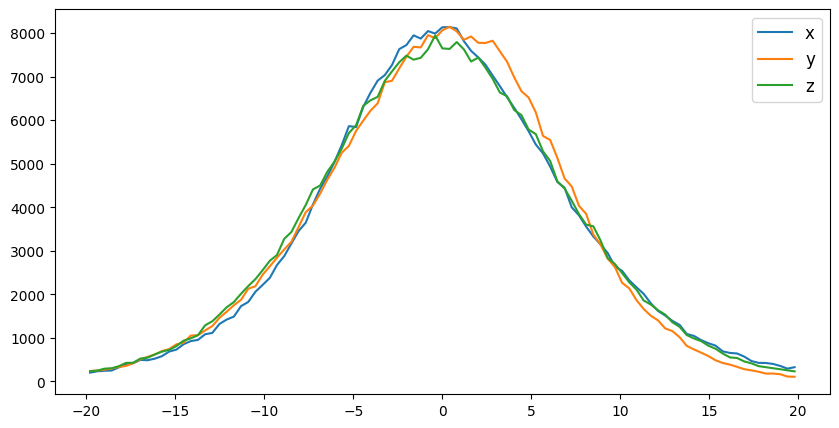

In [210]:
plt.figure( figsize=( 10 , 5 ) )
plt.plot( d_cents , dx , label = 'x' )
plt.plot( d_cents , dy , label = 'y' )      
plt.plot( d_cents , dz , label = 'z' )
plt.legend( fontsize = 12)

In [49]:
random_positions['x'] = random_positions[d]*np.cos(np.deg2rad(random_positions['DEC']))*np.cos(np.deg2rad(random_positions['RA']))
random_positions['y'] = random_positions[d]*np.cos(np.deg2rad(random_positions['DEC']))*np.sin(np.deg2rad(random_positions['RA']))
random_positions['z'] = random_positions[d]*np.sin(np.deg2rad(random_positions['DEC']))

In [50]:
recon_random_positions['x'] = recon_random_positions[d]*np.cos(np.deg2rad(recon_random_positions['DEC']))*np.cos(np.deg2rad(recon_random_positions['RA']))
recon_random_positions['y'] = recon_random_positions[d]*np.cos(np.deg2rad(recon_random_positions['DEC']))*np.sin(np.deg2rad(recon_random_positions['RA']))
recon_random_positions['z'] = recon_random_positions[d]*np.sin(np.deg2rad(recon_random_positions['DEC']))

In [211]:
random_position_catalogue = treecorr.Catalog( x=random_positions['x'], 
                                              y=random_positions['y'], 
                                              z=random_positions['z'])

recon_random_position_catalogue = treecorr.Catalog( x=recon_random_positions['x'], 
                                              y=recon_random_positions['y'], 
                                              z=recon_random_positions['z'])

In [226]:
def create_dtau_shape_catalogues( shape_obs , shape_recon, tau):
    new_catalogue = {
        'x': shape_recon['x'] + (shape_obs['x'] - shape_recon['x']) * tau,
        'y': shape_recon['y'] + (shape_obs['y'] - shape_recon['y']) * tau,
        'z': shape_recon['z'] + (shape_obs['z'] - shape_recon['z']) * tau,
        'w': shape_recon['w'],
        'e1': shape_recon['e1'],
        'e2': shape_recon['e2'],
    }

    shape_catalogue = treecorr.Catalog( x=new_catalogue['x'], 
                                    y=new_catalogue['y'], 
                                    z=new_catalogue['z'], 
                                    g1 = new_catalogue['e1'],
                                    g2 = new_catalogue['e2'], 
                                    w=new_catalogue['w'])
    
    return shape_catalogue

def create_dtau_position_catalogues( position_obs , position_recon, tau):
    new_catalogue = {
        'x': position_recon['x'] + (position_obs['x'] - position_recon['x']) * tau,
        'y': position_recon['y'] + (position_obs['y'] - position_recon['y']) * tau,
        'z': position_recon['z'] + (position_obs['z'] - position_recon['z']) * tau
    }
    position_catalogue = treecorr.Catalog( x=new_catalogue['x'], 
                                           y=new_catalogue['y'], 
                                           z=new_catalogue['z'])
    
    return position_catalogue

In [358]:
def process_ng_rpar_bin( position_cat , shape_cat , random_cat , min_rpar, max_rpar , min_sep, max_sep, nbins , bin_type = 'Linear' ):
    print('Running between rpar =', min_rpar, 'and rpar =', max_rpar)

    # Create the NNCorrelation objects
    ng = treecorr.NGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar, bin_type=bin_type) 
    rg = treecorr.NGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar, bin_type=bin_type) 

    # Process the position and random catalogues
    ng.process( position_cat , shape_cat , metric='Rperp')
    rg.process( random_cat , shape_cat, metric='Rperp')

    # Calculate the Landy-Szalay estimator
    xi_p , xi_x , var_xi = ng.calculateXi( rg = rg)
    r = np.exp(ng.meanlogr)

    return r , xi_p , xi_x, var_xi

In [631]:
# Define the parameters for the correlation function
min_sep_par = -8
max_sep_par = 8
nbins = 20   

min_sep = 0.1
#min_sep = 0.8
max_sep = 200

bin_type = 'Linear'
#bin_type = 'Log'

In [632]:
r , w_xi_p , w_xi_x, var_xi = process_ng_rpar_bin( position_catalogue , 
                                          shape_catalogue , 
                                          random_position_catalogue , 
                                          min_sep_par , max_sep_par , min_sep , max_sep , nbins, bin_type=bin_type )

Running between rpar = -8 and rpar = 8


In [633]:
recon_r , recon_w_xi_p , recon_w_xi_x, recon_var_xi = process_ng_rpar_bin( recon_position_catalogue ,
                                                             recon_shape_catalogue ,
                                                             recon_random_position_catalogue , 
                                                             min_sep_par , max_sep_par , min_sep , max_sep , nbins, bin_type=bin_type )

Running between rpar = -8 and rpar = 8


In [634]:
taus_w_xi_p = []
taus_w_xi_x = []
taus_w_var = []

taus = [ -2 , 0.3 , 0.45 , 0.85 ]

for tau in taus:

    tau_position_catalogue = create_dtau_position_catalogues( positions , recon_positions , tau )
    tau_random_catalogue = create_dtau_position_catalogues( random_positions , recon_random_positions , tau )
    tau_shape_catalogue = create_dtau_shape_catalogues( shapes , recon_shapes , tau )

    hrecon_r , hrecon_w_xi_p , hrecon_w_xi_x, hrecon_var_xi = process_ng_rpar_bin( tau_position_catalogue ,
                                                                tau_shape_catalogue ,
                                                                tau_random_catalogue , 
                                                                min_sep_par , max_sep_par , min_sep , max_sep , nbins, bin_type=bin_type )
    
    taus_w_xi_p.append( hrecon_w_xi_p )
    taus_w_xi_x.append( hrecon_w_xi_x )
    taus_w_var.append( hrecon_var_xi )

Running between rpar = -8 and rpar = 8
Running between rpar = -8 and rpar = 8
Running between rpar = -8 and rpar = 8
Running between rpar = -8 and rpar = 8


In [635]:
h = 0.7

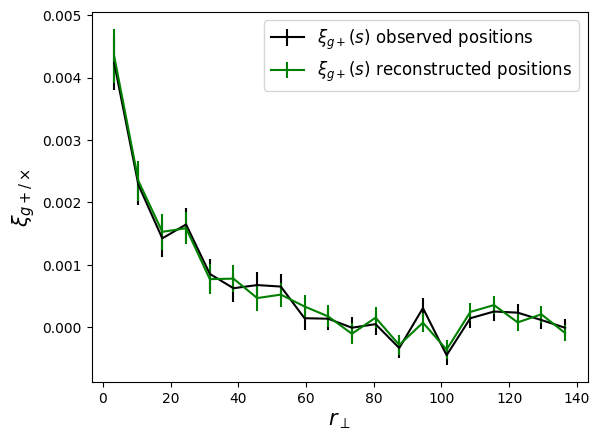

In [636]:
plt.errorbar( r  * h, -w_xi_p , yerr = var_xi**0.5, fmt = 'k-' , label = r'$\xi_{g+}(s)$ observed positions')
#plt.errorbar( r  * h, w_xi_x , yerr = var_xi**0.5, fmt = 'k--' , label = r'$\xi_{g\times}(s)$ observed positions')

# plt.errorbar( recon_r  * h, recon_w_xi_p , yerr = recon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar( recon_r  * h, recon_w_xi_x , yerr = recon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

plt.errorbar( hrecon_r  * h, -hrecon_w_xi_p , yerr = hrecon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
#plt.errorbar( recon_r  * h, hrecon_w_xi_x , yerr = hrecon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}$' , fontsize = 15 )
plt.legend( fontsize = 12 )

(-0.001, 0.005)

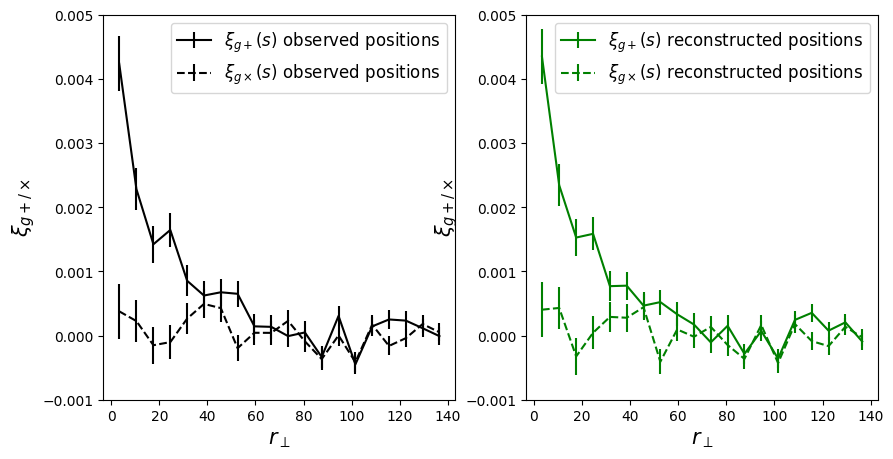

In [637]:
ymin = -0.001
ymax = 0.005

plt.figure( figsize=( 10 , 5 ) )
plt.subplot(121)
plt.errorbar( r  * h, -w_xi_p , yerr = var_xi**0.5, fmt = 'k-' , label = r'$\xi_{g+}(s)$ observed positions')
plt.errorbar( r  * h, -w_xi_x , yerr = var_xi**0.5, fmt = 'k--' , label = r'$\xi_{g\times}(s)$ observed positions')

#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}$' , fontsize = 15 )
plt.legend( fontsize = 12 )
plt.ylim( ymin , ymax)




plt.subplot(122)
plt.errorbar( hrecon_r  * h, -hrecon_w_xi_p , yerr = hrecon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
plt.errorbar( hrecon_r  * h, -hrecon_w_xi_x , yerr = hrecon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}$' , fontsize = 15 )
plt.legend( fontsize = 12 )
plt.ylim( ymin , ymax)


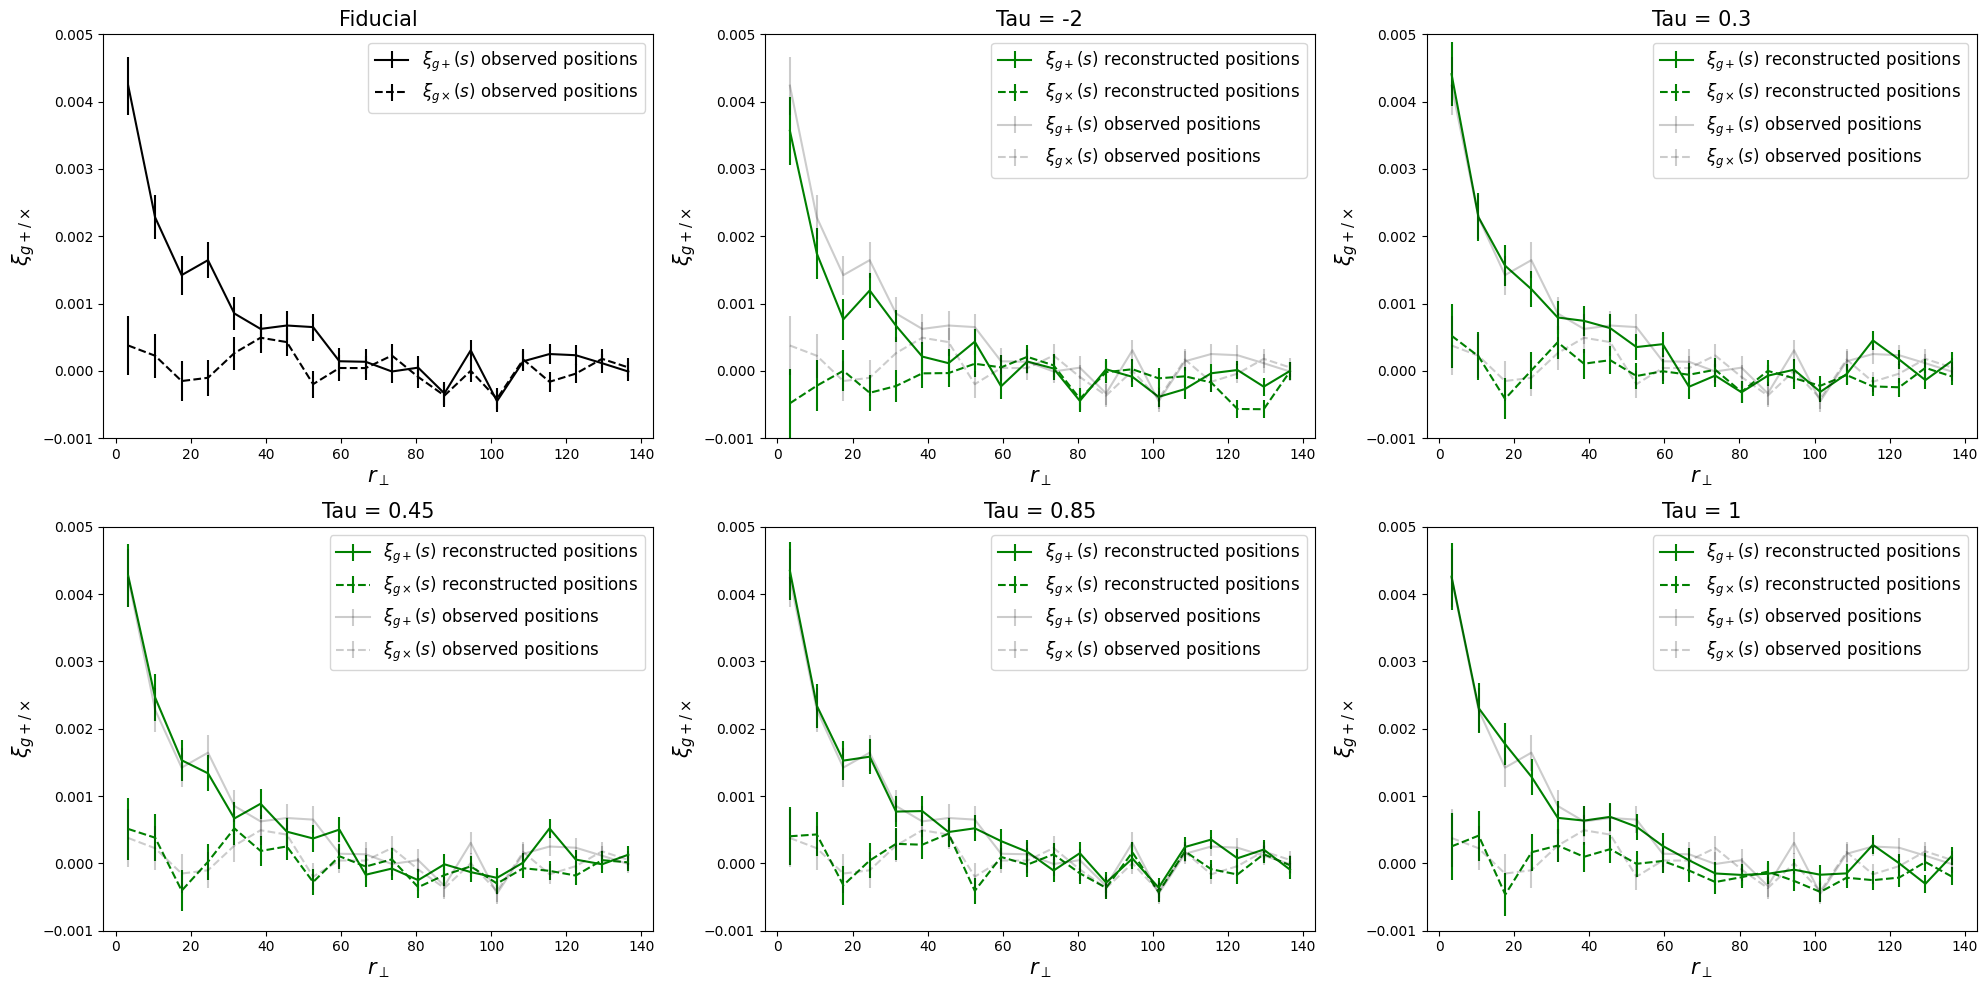

In [638]:
plt.figure(figsize=(20, 10))

ymin = -0.001
ymax = 0.005

# Plot the fiducial (observed and reconstructed positions)
plt.subplot(2, 3, 1)
plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
# plt.errorbar(hrecon_r * h, -hrecon_w_xi_p, yerr=hrecon_var_xi**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar(hrecon_r * h, -hrecon_w_xi_x, yerr=hrecon_var_xi**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
plt.xlabel(r'$r_{\perp}$', fontsize=15)
plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
plt.legend(fontsize=12)
plt.title('Fiducial', fontsize=15)
plt.ylim( ymin , ymax)
#plt.xscale('log')


# Loop through each tau and plot its correlation functions
for i, tau in enumerate(taus):
    plt.subplot(2, 3, i + 2)  # Start from the second subplot
    plt.errorbar(hrecon_r * h, -taus_w_xi_p[i], yerr=taus_w_var[i]**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
    plt.errorbar(hrecon_r * h, -taus_w_xi_x[i], yerr=taus_w_var[i]**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
    plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, alpha = 0.2 , fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
    plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, alpha = 0.2 , fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
    plt.xlabel(r'$r_{\perp}$', fontsize=15)
    plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
    plt.legend(fontsize=12)
    plt.title(f'Tau = {tau}', fontsize=15)
    plt.ylim( ymin , ymax)
    #plt.xscale('log')


plt.subplot(2, 3, 6)
# plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
# plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
plt.errorbar(recon_r * h, -recon_w_xi_p, yerr=recon_var_xi**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
plt.errorbar(recon_r * h, -recon_w_xi_x, yerr=recon_var_xi**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, alpha = 0.2 , fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, alpha = 0.2 , fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
plt.xlabel(r'$r_{\perp}$', fontsize=15)
plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
plt.legend(fontsize=12)
plt.title('Tau = 1', fontsize=15)
plt.ylim( ymin , ymax)
#plt.xscale('log')

plt.tight_layout()
plt.show()

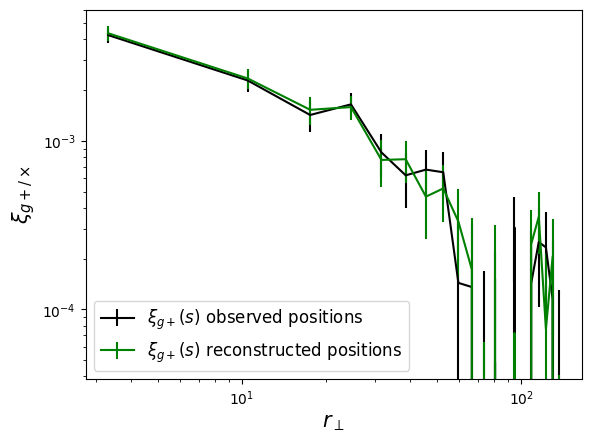

In [639]:
plt.errorbar( r  * h, -w_xi_p , yerr = var_xi**0.5, fmt = 'k-' , label = r'$\xi_{g+}(s)$ observed positions')
#plt.errorbar( r  * h, w_xi_x , yerr = var_xi**0.5, fmt = 'k--' , label = r'$\xi_{g\times}(s)$ observed positions')

# plt.errorbar( recon_r  * h, recon_w_xi_p , yerr = recon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar( recon_r  * h, recon_w_xi_x , yerr = recon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

plt.errorbar( hrecon_r  * h, -hrecon_w_xi_p , yerr = hrecon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
#plt.errorbar( recon_r  * h, hrecon_w_xi_x , yerr = hrecon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}$' , fontsize = 15 )
plt.legend( fontsize = 12 )
plt.yscale('log')
plt.xscale('log')

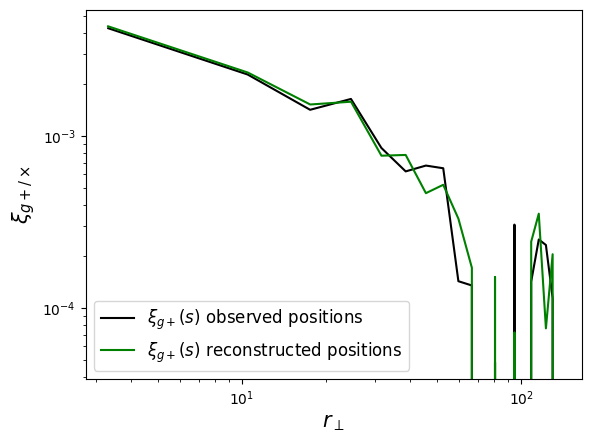

In [640]:
plt.plot( r  * h, -w_xi_p ,  'k-' , label = r'$\xi_{g+}(s)$ observed positions')
#plt.errorbar( r  * h, w_xi_x , yerr = var_xi**0.5, fmt = 'k--' , label = r'$\xi_{g\times}(s)$ observed positions')

# plt.errorbar( recon_r  * h, recon_w_xi_p , yerr = recon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar( recon_r  * h, recon_w_xi_x , yerr = recon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

plt.plot( hrecon_r  * h, -hrecon_w_xi_p , 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
#plt.errorbar( recon_r  * h, hrecon_w_xi_x , yerr = hrecon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}$' , fontsize = 15 )
plt.legend( fontsize = 12 )
plt.yscale('log')
plt.xscale('log')

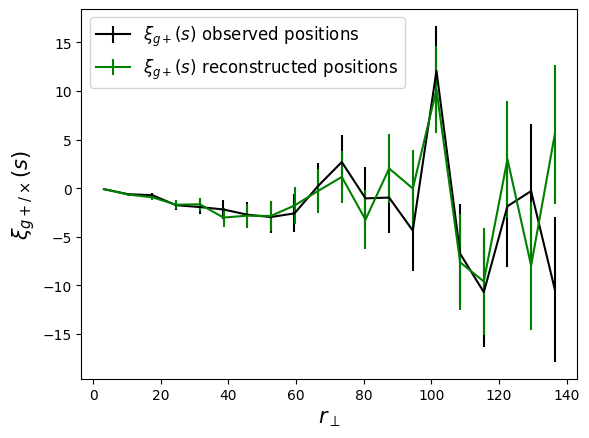

In [618]:
plt.errorbar( r  * h, r **2 * w_xi_p , yerr = r**2 * var_xi**0.5, fmt = 'k-' , label = r'$\xi_{g+}(s)$ observed positions')
# plt.errorbar( r  * h, w_xi_x , yerr = var_xi**0.5, fmt = 'k--' , label = r'$\xi_{g\times}(s)$ observed positions')

plt.errorbar( hrecon_r  * h, r **2 * hrecon_w_xi_p , yerr = r**2 * hrecon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar( recon_r  * h, recon_w_xi_x , yerr = recon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}(s)$' , fontsize = 15 )
plt.legend( fontsize = 12 )
#plt.xlim( 80 , 140 )

(-5.0, 2.0)

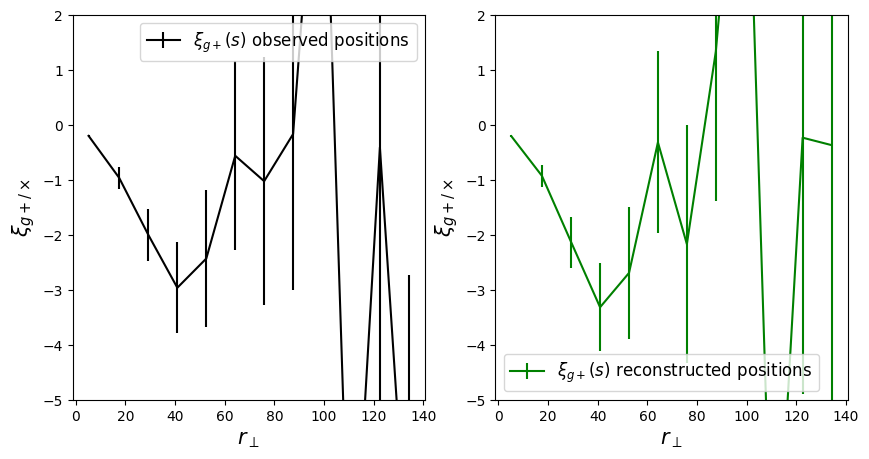

In [596]:
ymin = -5
ymax = 2

plt.figure( figsize=( 10 , 5 ) )
plt.subplot(121)
plt.errorbar( r  * h, r **2 * w_xi_p , yerr = r**2 * var_xi**0.5, fmt = 'k-' , label = r'$\xi_{g+}(s)$ observed positions')

#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}$' , fontsize = 15 )
plt.legend( fontsize = 12 )
plt.ylim( ymin , ymax)




plt.subplot(122)
plt.errorbar( hrecon_r  * h, r **2 * hrecon_w_xi_p , yerr = r**2 * hrecon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')


#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}$' , fontsize = 15 )
plt.legend( fontsize = 12 )
plt.ylim( ymin , ymax)

In [597]:
alt_taus_w_xi_p = []
alt_taus_w_xi_x = []
alt_taus_w_var = []

taus = [ 0.1 , 0.3 , 0.45 , 0.85 ]

for tau in taus:

    tau_position_catalogue = create_dtau_position_catalogues( positions , recon_positions , tau )
    tau_random_catalogue = create_dtau_position_catalogues( random_positions , recon_random_positions , tau )
    tau_shape_catalogue = create_dtau_shape_catalogues( shapes , recon_shapes , 1 )

    hrecon_r , hrecon_w_xi_p , hrecon_w_xi_x, hrecon_var_xi = process_ng_rpar_bin( tau_position_catalogue ,
                                                                tau_shape_catalogue ,
                                                                tau_random_catalogue , 
                                                                min_sep_par , max_sep_par , min_sep , max_sep , nbins, bin_type=bin_type )
    
    alt_taus_w_xi_p.append( hrecon_w_xi_p )
    alt_taus_w_xi_x.append( hrecon_w_xi_x )
    alt_taus_w_var.append( hrecon_var_xi )

Running between rpar = -4 and rpar = 4
Running between rpar = -4 and rpar = 4
Running between rpar = -4 and rpar = 4
Running between rpar = -4 and rpar = 4


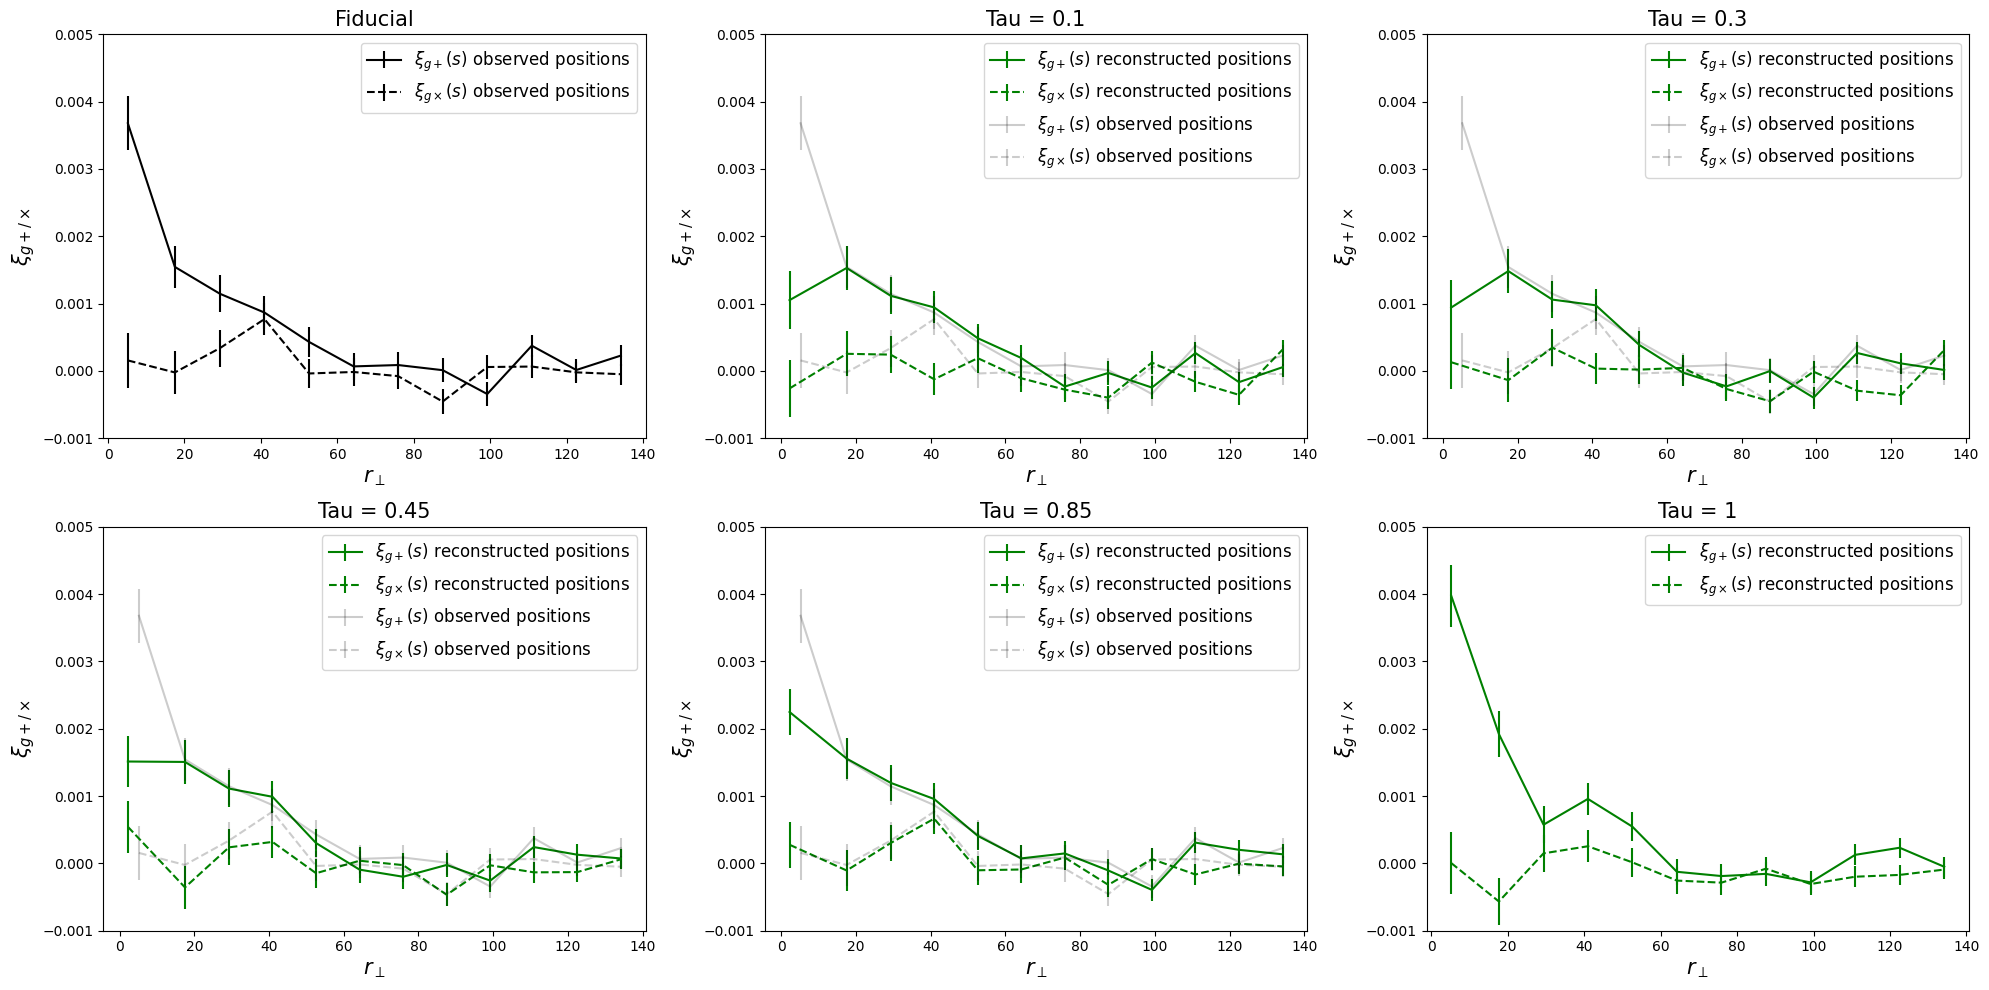

In [598]:
plt.figure(figsize=(20, 10))

ymin = -0.001
ymax = 0.005

# Plot the fiducial (observed and reconstructed positions)
plt.subplot(2, 3, 1)
plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
# plt.errorbar(hrecon_r * h, -hrecon_w_xi_p, yerr=hrecon_var_xi**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar(hrecon_r * h, -hrecon_w_xi_x, yerr=hrecon_var_xi**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
plt.xlabel(r'$r_{\perp}$', fontsize=15)
plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
plt.legend(fontsize=12)
plt.title('Fiducial', fontsize=15)
plt.ylim( ymin , ymax)


# Loop through each tau and plot its correlation functions
for i, tau in enumerate(taus):
    plt.subplot(2, 3, i + 2)  # Start from the second subplot
    plt.errorbar(hrecon_r * h, -alt_taus_w_xi_p[i], yerr=alt_taus_w_var[i]**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
    plt.errorbar(hrecon_r * h, -alt_taus_w_xi_x[i], yerr=alt_taus_w_var[i]**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
    plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, alpha = 0.2 , fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
    plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, alpha = 0.2 , fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
    plt.xlabel(r'$r_{\perp}$', fontsize=15)
    plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
    plt.legend(fontsize=12)
    plt.title(f'Tau = {tau}', fontsize=15)
    plt.ylim( ymin , ymax)


plt.subplot(2, 3, 6)
# plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
# plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
plt.errorbar(recon_r * h, -recon_w_xi_p, yerr=recon_var_xi**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
plt.errorbar(recon_r * h, -recon_w_xi_x, yerr=recon_var_xi**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
plt.xlabel(r'$r_{\perp}$', fontsize=15)
plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
plt.legend(fontsize=12)
plt.title('Tau = 1', fontsize=15)
plt.ylim( ymin , ymax)

plt.tight_layout()
plt.show()

In [599]:
alt_taus_w_xi_p = []
alt_taus_w_xi_x = []
alt_taus_w_var = []

taus = [ 0.1 , 0.3 , 0.45 , 0.85 ]

for tau in taus:

    tau_position_catalogue = create_dtau_position_catalogues( positions , recon_positions , 1 )
    tau_random_catalogue = create_dtau_position_catalogues( random_positions , recon_random_positions , 1 )
    tau_shape_catalogue = create_dtau_shape_catalogues( shapes , recon_shapes , tau )

    hrecon_r , hrecon_w_xi_p , hrecon_w_xi_x, hrecon_var_xi = process_ng_rpar_bin( tau_position_catalogue ,
                                                                tau_shape_catalogue ,
                                                                tau_random_catalogue , 
                                                                min_sep_par , max_sep_par , min_sep , max_sep , nbins, bin_type=bin_type )
    
    alt_taus_w_xi_p.append( hrecon_w_xi_p )
    alt_taus_w_xi_x.append( hrecon_w_xi_x )
    alt_taus_w_var.append( hrecon_var_xi )

Running between rpar = -4 and rpar = 4
Running between rpar = -4 and rpar = 4
Running between rpar = -4 and rpar = 4
Running between rpar = -4 and rpar = 4


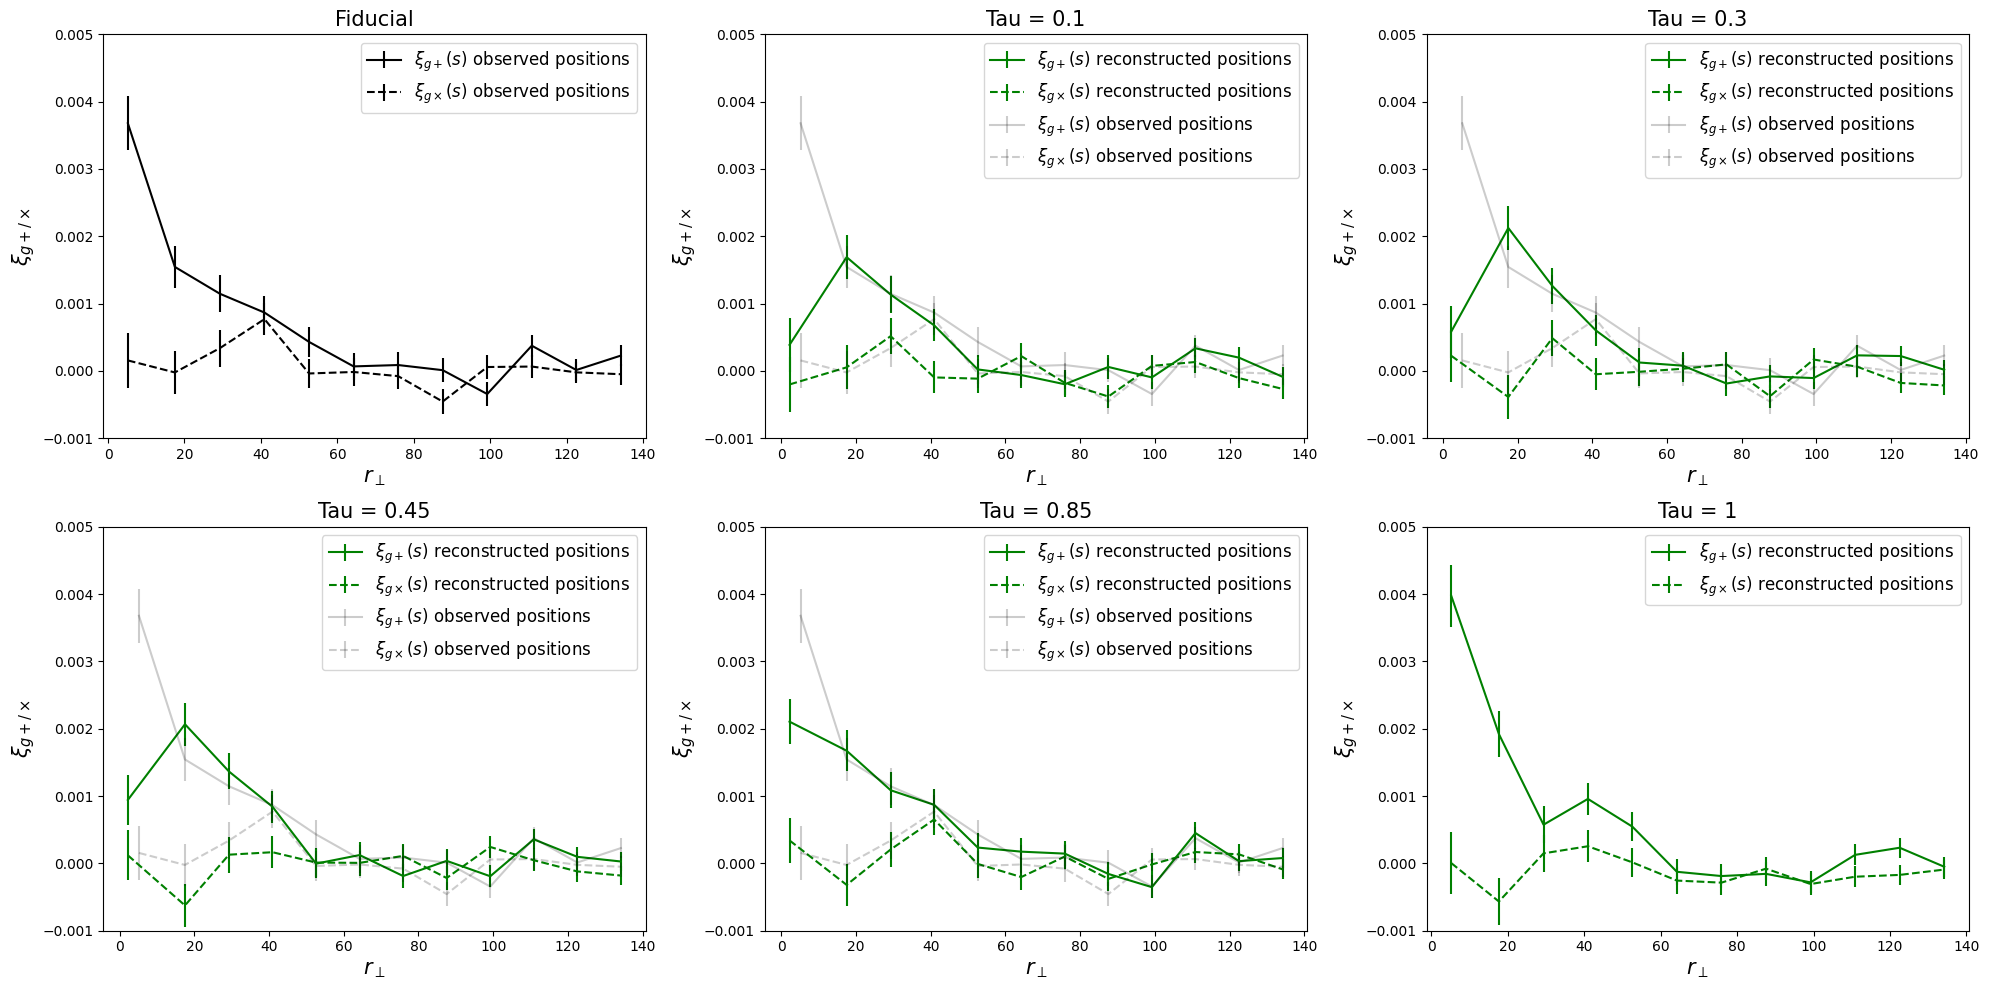

In [600]:
plt.figure(figsize=(20, 10))

ymin = -0.001
ymax = 0.005

# Plot the fiducial (observed and reconstructed positions)
plt.subplot(2, 3, 1)
plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
# plt.errorbar(hrecon_r * h, -hrecon_w_xi_p, yerr=hrecon_var_xi**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar(hrecon_r * h, -hrecon_w_xi_x, yerr=hrecon_var_xi**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
plt.xlabel(r'$r_{\perp}$', fontsize=15)
plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
plt.legend(fontsize=12)
plt.title('Fiducial', fontsize=15)
plt.ylim( ymin , ymax)


# Loop through each tau and plot its correlation functions
for i, tau in enumerate(taus):
    plt.subplot(2, 3, i + 2)  # Start from the second subplot
    plt.errorbar(hrecon_r * h, -alt_taus_w_xi_p[i], yerr=alt_taus_w_var[i]**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
    plt.errorbar(hrecon_r * h, -alt_taus_w_xi_x[i], yerr=alt_taus_w_var[i]**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
    plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, alpha = 0.2 , fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
    plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, alpha = 0.2 , fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
    plt.xlabel(r'$r_{\perp}$', fontsize=15)
    plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
    plt.legend(fontsize=12)
    plt.title(f'Tau = {tau}', fontsize=15)
    plt.ylim( ymin , ymax)


plt.subplot(2, 3, 6)
# plt.errorbar(r * h, -w_xi_p, yerr=var_xi**0.5, fmt='k-', label=r'$\xi_{g+}(s)$ observed positions')
# plt.errorbar(r * h, -w_xi_x, yerr=var_xi**0.5, fmt='k--', label=r'$\xi_{g\times}(s)$ observed positions')
plt.errorbar(recon_r * h, -recon_w_xi_p, yerr=recon_var_xi**0.5, fmt='g-', label=r'$\xi_{g+}(s)$ reconstructed positions')
plt.errorbar(recon_r * h, -recon_w_xi_x, yerr=recon_var_xi**0.5, fmt='g--', label=r'$\xi_{g\times}(s)$ reconstructed positions')
plt.xlabel(r'$r_{\perp}$', fontsize=15)
plt.ylabel(r'$\xi_{g+/ \times}$', fontsize=15)
plt.legend(fontsize=12)
plt.title('Tau = 1', fontsize=15)
plt.ylim( ymin , ymax)

plt.tight_layout()
plt.show()

(-0.001, 0.001)

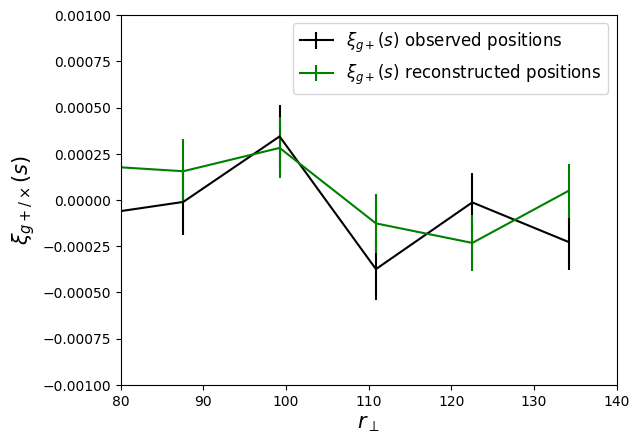

In [601]:
plt.errorbar( r  * h,  w_xi_p , yerr = var_xi**0.5, fmt = 'k-' , label = r'$\xi_{g+}(s)$ observed positions')
# plt.errorbar( r  * h, w_xi_x , yerr = var_xi**0.5, fmt = 'k--' , label = r'$\xi_{g\times}(s)$ observed positions')

plt.errorbar( recon_r  * h,  recon_w_xi_p , yerr = recon_var_xi**0.5, fmt = 'g-' , label = r'$\xi_{g+}(s)$ reconstructed positions')
# plt.errorbar( recon_r  * h, recon_w_xi_x , yerr = recon_var_xi**0.5, fmt = 'g--' , label = r'$\xi_{g\times}(s)$ reconstructed positions')

#plt.xscale('log')
plt.xlabel(r'$r_{\perp}$' , fontsize = 15 )
plt.ylabel(r'$\xi_{g+/ \times}(s)$' , fontsize = 15 )
plt.legend( fontsize = 12 )
plt.xlim( 80 , 140 )
plt.ylim( -0.001 , 0.001 )

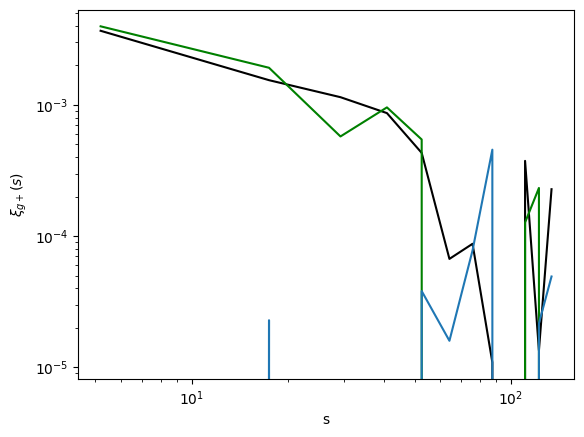

In [602]:
plt.plot( r  * h, -w_xi_p , 'k-' )
plt.plot( r  * h, -recon_w_xi_p , 'g-' )
plt.plot( r  * h, w_xi_x )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('s')
plt.ylabel(r'$\xi_{g+}(s)$')
plt.show()

In [603]:
# np.save('lrg_w_xi_p.npy', w_xi_p )
# np.save('lrg_w_xi_x.npy', w_xi_x )
# np.save('lrg_w_xi_x.npy', w_xi_x )
# np.save('lrg_w_r.npy', r )

In [604]:
# Define the range and number of bins for rpar
rpar_bins = np.linspace(-200, 200, 201 )  

# Define the parameters for the correlation function
min_sep = 0.1  # Minimum separation in Mpc
max_sep = 200  # Maximum separation in Mpc
nbins = 100     # Number of bins

In [167]:
# Initialize lists to store results
xi_gn_p_results = []
xi_gn_x_results = []
var_gn_x_results = []
r_results = []

# Iterate over rpar bins
for i in range(len(rpar_bins) - 1):

    min_rpar = rpar_bins[i]
    max_rpar = rpar_bins[i + 1]

    r , xi_p , xi_x, var = process_ng_rpar_bin( position_catalogue , shape_catalogue , random_position_catalogue , min_rpar, max_rpar , min_sep , max_sep , nbins )

    # Store the results
    xi_gn_p_results.append( xi_p )
    xi_gn_x_results.append( xi_x )
    var_gn_x_results.append( var ) 
    r_results.append(r)

Running between rpar = -200.0 and rpar = -198.0
Running between rpar = -198.0 and rpar = -196.0
Running between rpar = -196.0 and rpar = -194.0
Running between rpar = -194.0 and rpar = -192.0
Running between rpar = -192.0 and rpar = -190.0
Running between rpar = -190.0 and rpar = -188.0
Running between rpar = -188.0 and rpar = -186.0
Running between rpar = -186.0 and rpar = -184.0
Running between rpar = -184.0 and rpar = -182.0
Running between rpar = -182.0 and rpar = -180.0
Running between rpar = -180.0 and rpar = -178.0
Running between rpar = -178.0 and rpar = -176.0
Running between rpar = -176.0 and rpar = -174.0
Running between rpar = -174.0 and rpar = -172.0
Running between rpar = -172.0 and rpar = -170.0
Running between rpar = -170.0 and rpar = -168.0
Running between rpar = -168.0 and rpar = -166.0
Running between rpar = -166.0 and rpar = -164.0
Running between rpar = -164.0 and rpar = -162.0
Running between rpar = -162.0 and rpar = -160.0
Running between rpar = -160.0 and rpar =

In [169]:
xi_gn_p_results = np.array(xi_gn_p_results)
xi_gn_x_results = np.array(xi_gn_x_results)
var_gn_x_results = np.array(var_gn_x_results)

In [168]:
np.save('lrg_xi_gn_p_results',xi_gn_p_results)
np.save('lrg_xi_gn_x_results',xi_gn_x_results)
np.save('lrg_var_gn_results',var_gn_x_results)

In [ ]:
# Initialize lists to store results
recon_xi_gn_p_results = []
recon_xi_gn_x_results = []
recon_var_gn_x_results = []
recon_r_results = []

# Iterate over rpar bins
for i in range(len(rpar_bins) - 1):

    min_rpar = rpar_bins[i]
    max_rpar = rpar_bins[i + 1]

    r , xi_p , xi_x, var = process_ng_rpar_bin( recon_position_catalogue , recon_shape_catalogue , recon_random_position_catalogue , min_rpar, max_rpar , min_sep , max_sep , nbins )

    # Store the results
    recon_xi_gn_p_results.append( xi_p )
    recon_xi_gn_x_results.append( xi_x )
    recon_var_gn_x_results.append( var ) 
    recon_r_results.append(r)

Running between rpar = -200.0 and rpar = -198.0


NameError: name 'recon_var_gn_x_results' is not defined

In [ ]:
recon_xi_gn_p_results = np.array(recon_xi_gn_p_results)
recon_xi_gn_x_results = np.array(recon_xi_gn_x_results)
recon_var_gn_x_results = np.array(recon_var_gn_x_results)

np.save('recon_lrg_xi_gn_p_results',recon_xi_gn_p_results)
np.save('recon_lrg_xi_gn_x_results',recon_xi_gn_x_results)
np.save('recon_lrg_var_results',recon_var_gn_x_results)

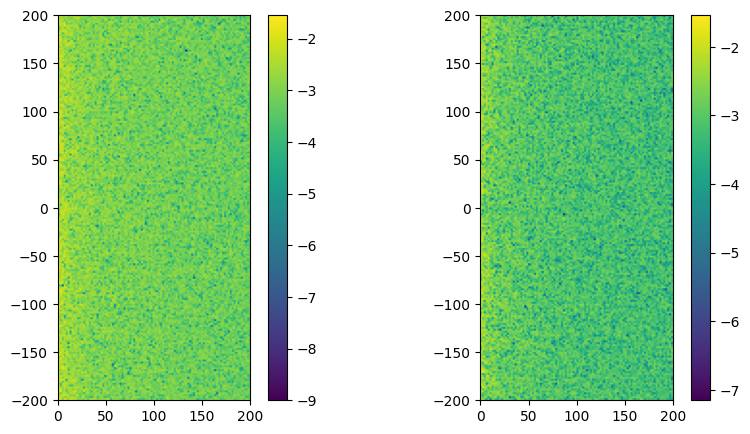

In [ ]:
plt.figure( figsize = ( 10 , 5 ))
plt.subplot(121)
plt.imshow( np.log10( np.abs( xi_gn_p_results ) ) , extent = [ 0 , 200 , -200 , 200 ] )
plt.colorbar()

plt.subplot(122)
plt.imshow( np.log10( np.abs( xi_gn_x_results ) ) , extent = [ 0 , 200 , -200 , 200 ] )
plt.colorbar()

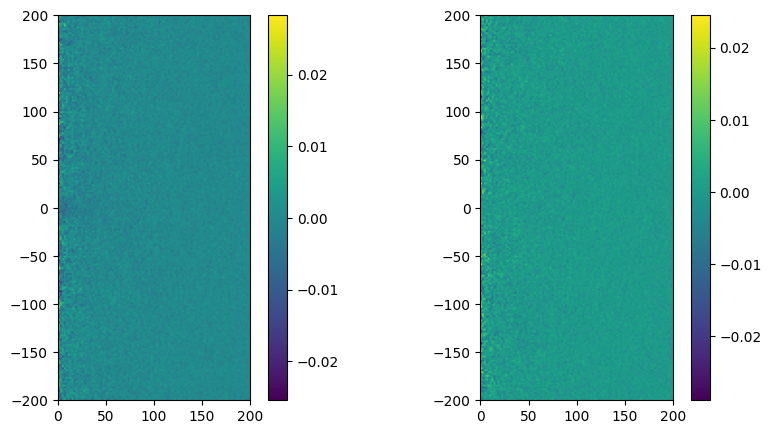

In [128]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(xi_gn_p_results, extent=[0, 200, -200, 200])
plt.colorbar()

plt.subplot(122)
plt.imshow(xi_gn_x_results, extent=[0, 200, -200, 200])
plt.colorbar()

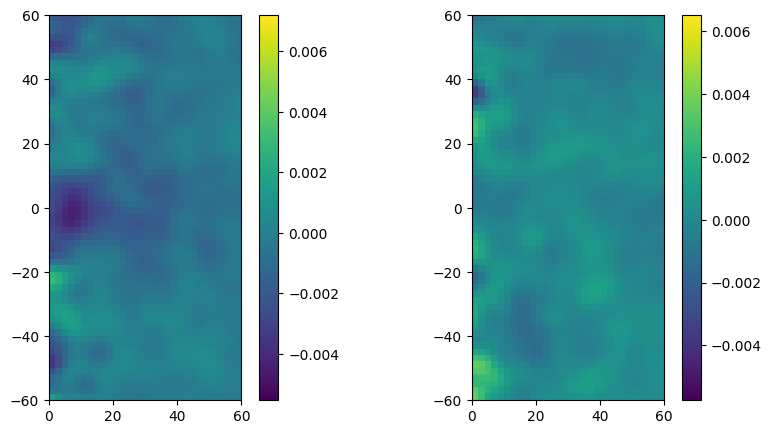

In [131]:
from scipy.ndimage import gaussian_filter

sigma = 1.5

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

plt.subplot(122)
plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

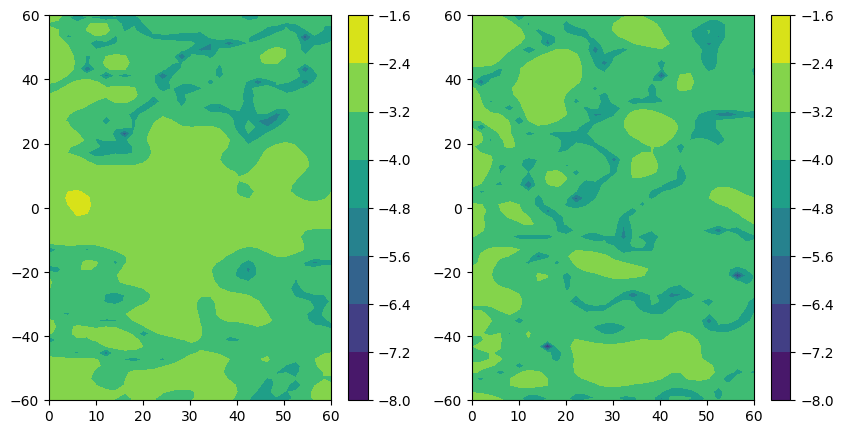

In [132]:
sigma = 1.5

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.contourf( np.log10( np.abs(  smoothed_xi_gn_p_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

plt.subplot(122)
plt.contourf( np.log10( np.abs( smoothed_xi_gn_x_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

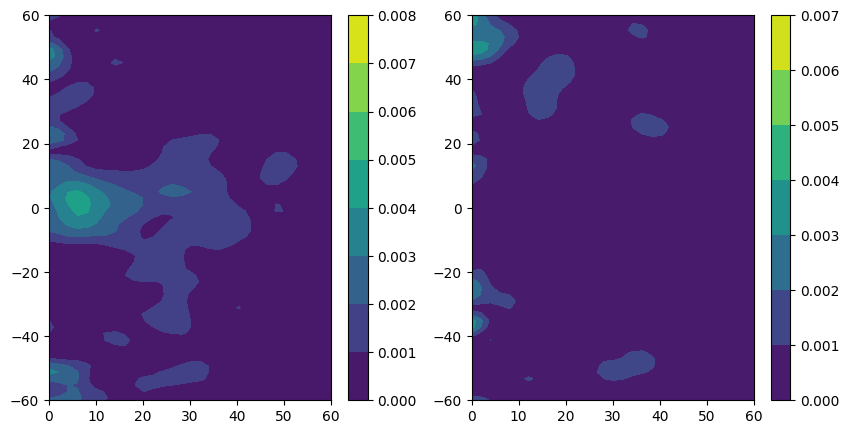

In [133]:
sigma = 1.5

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.contourf( ( np.abs(  smoothed_xi_gn_p_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

plt.subplot(122)
plt.contourf( ( np.abs( smoothed_xi_gn_x_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

In [134]:
xi_gn_p_results.shape

(200, 100)

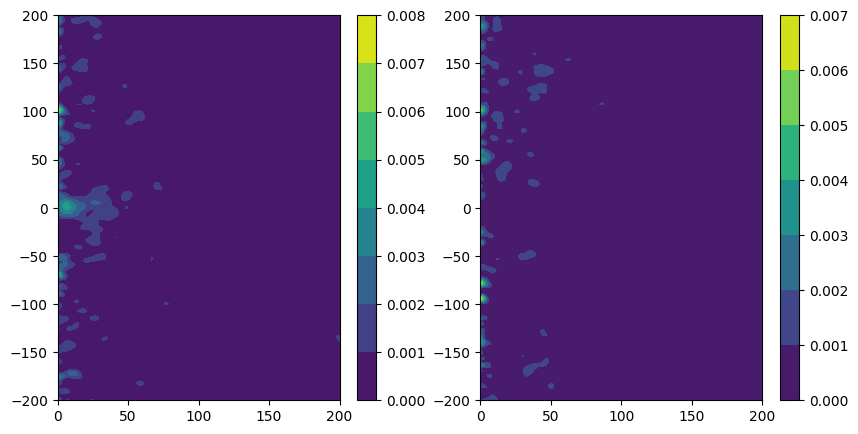

In [135]:
sigma = 1.5

xtent = 200

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.contourf( ( np.abs(  smoothed_xi_gn_p_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , xtent )
plt.ylim( -xtent , xtent )
plt.colorbar()

plt.subplot(122)
plt.contourf( ( np.abs( smoothed_xi_gn_x_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , xtent )
plt.ylim( -xtent , xtent )
plt.colorbar()

In [8]:
# Reflect the array about r_par = 0
xi_gn_p_reflected = xi_gn_p_results[::-1, :]

# Sum the original and reflected arrays
xi_gn_p_summed = xi_gn_p_results + xi_gn_p_reflected

# Divide by 2 to get the average
xi_gn_p_avg = xi_gn_p_summed / 2


In [9]:
sigma = 3

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_avg, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.contourf( ( (  smoothed_xi_gn_p_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( 0 , 60 )
plt.colorbar()

plt.subplot(122)
plt.contourf( ( ( smoothed_xi_gn_x_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( 0 , 60 )
plt.colorbar()

In [10]:
sigma = 3

xtent = 200

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_avg, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.contourf( ( (  smoothed_xi_gn_p_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , xtent )
plt.ylim( 0 , xtent )
plt.colorbar()

plt.subplot(122)
plt.contourf( ( ( smoothed_xi_gn_x_results )), extent=[0, 200, -200, 200])
plt.xlim(  0 , xtent )
plt.ylim( 0 , xtent )
plt.colorbar()

In [ ]:
sigma = 1.5

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.log(-smoothed_xi_gn_p_results ), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

plt.subplot(122)
plt.imshow(np.log(-smoothed_xi_gn_x_results ), extent=[0, 200, -200, 200])
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

In [ ]:
sigma = 2.5

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200] , vmin =-1e-3, vmax=1e-3 )
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

plt.subplot(122)
plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200] , vmin =-1e-3, vmax=1e-3 )
plt.xlim(  0 , 60 )
plt.ylim( -60 , 60 )
plt.colorbar()

In [ ]:
from scipy.ndimage import gaussian_filter

sigma = 2

# Apply Gaussian smoothing
smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200])
plt.colorbar()

plt.subplot(122)
plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200])
plt.colorbar()

In [ ]:
# # Initialize lists to store results
# sticks_xi_gn_p_results = []
# sticks_xi_gn_x_results = []
# r_results = []

# # Iterate over rpar bins
# for i in range(len(rpar_bins) - 1):

#     min_rpar = rpar_bins[i]
#     max_rpar = rpar_bins[i + 1]

#     r , xi_p , xi_x = process_ng_rpar_bin( stick_catalogue , min_rpar, max_rpar , min_sep , max_sep , nbins )

#     # Store the results
#     sticks_xi_gn_p_results.append( xi_p )
#     sticks_xi_gn_x_results.append( xi_x )
#     r_results.append(r)

In [ ]:
r = np.linspace( 0.5 , 200 , 100 )

In [ ]:
# Assuming r_perp_bins and r_par_bins are defined
r_perp_cents = r = np.linspace( 0.5 , 200 , 100 )
r_par_cents = ( rpar_bins[1:] + rpar_bins[:-1] )/2.

# Flatten the xi_results and r_results arrays
xi_gn_p_flat = np.array(xi_gn_p_results).flatten()
xi_gn_x_flat = np.array(xi_gn_x_results).flatten()

# sticks_xi_gn_p_flat = np.array(sticks_xi_gn_p_results).flatten()
# sticks_xi_gn_x_flat = np.array(sticks_xi_gn_x_results).flatten()


r_perp_flat = np.array([r_perp_cents] * len(r_par_cents)).flatten()
r_par_flat = np.array([[r_par] * len(r_perp_cents) for r_par in r_par_cents]).flatten()

In [ ]:
# Calculate s for each pair of (r_perp, r_par)
s = np.sqrt(r_perp_flat**2 + r_par_flat**2)

# Define bins for s
s_bins = np.linspace(0.5, 200, 30 )
s_bins = np.logspace( np.log10( 0.1 ) , np.log10( 200 ) , 45 )
s_cents = (s_bins[1:] + s_bins[:-1]) / 2.

# Initialize arrays to store the results
xi_p_s = np.zeros(len(s_bins) - 1)
var_xi_p_s = np.zeros(len(s_bins) - 1)
counts_p = np.zeros(len(s_bins) - 1)

xi_x_s = np.zeros(len(s_bins) - 1)
var_xi_x_s = np.zeros(len(s_bins) - 1)
counts_x = np.zeros(len(s_bins) - 1)

# Calculate theta
theta = np.degrees(np.arctan2(r_par_flat, r_perp_flat))

# Bin the results by s and calculate the radial averages and variances
for i in range(len(s_bins) - 1):
    mask = (s >= s_bins[i]) & (s < s_bins[i + 1])
    if np.any(mask):  # Check if there are any elements in the mask
        xi_p_s[i] = np.mean(xi_gn_p_flat[mask])
        var_xi_p_s[i] = np.var(xi_gn_p_flat[mask])
        counts_p[i] = np.sum(mask)

        xi_x_s[i] = np.mean(xi_gn_x_flat[mask])
        var_xi_x_s[i] = np.var(xi_gn_x_flat[mask])
        counts_x[i] = np.sum(mask)

# Handle cases where there are no counts in a bin
xi_p_s[counts_p == 0] = np.nan
var_xi_p_s[counts_p == 0] = np.nan

xi_x_s[counts_x == 0] = np.nan
var_xi_x_s[counts_x == 0] = np.nan

# Calculate the average within the specified theta ranges and r_perp >= 5
theta_mask = (((theta > -45) & (theta < 45)) | ((theta > 135) & (theta < 225))) & (r_perp_flat >= 5)

xi_p_s_theta = np.zeros(len(s_bins) - 1)
var_xi_p_s_theta = np.zeros(len(s_bins) - 1)
counts_p_theta = np.zeros(len(s_bins) - 1)

xi_x_s_theta = np.zeros(len(s_bins) - 1)
var_xi_x_s_theta = np.zeros(len(s_bins) - 1)
counts_x_theta = np.zeros(len(s_bins) - 1)

for i in range(len(s_bins) - 1):
    mask = (s >= s_bins[i]) & (s < s_bins[i + 1]) & theta_mask 
    if np.any(mask):  # Check if there are any elements in the mask
        xi_p_s_theta[i] = np.mean(xi_gn_p_flat[mask])
        var_xi_p_s_theta[i] = np.var(xi_gn_p_flat[mask])
        counts_p_theta[i] = np.sum(mask)

        xi_x_s_theta[i] = np.mean(xi_gn_x_flat[mask])
        var_xi_x_s_theta[i] = np.var(xi_gn_x_flat[mask])
        counts_x_theta[i] = np.sum(mask)

# Handle cases where there are no counts in a bin
xi_p_s_theta[counts_p_theta == 0] = np.nan
var_xi_p_s_theta[counts_p_theta == 0] = np.nan

xi_x_s_theta[counts_x_theta == 0] = np.nan
var_xi_x_s_theta[counts_x_theta == 0] = np.nan

In [ ]:
h =0.7

In [ ]:
#plt.errorbar( s_cents * h , xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.errorbar( s_cents * h , -xi_p_s_theta, fmt='ko' , yerr = var_xi_p_s**0.5  / counts_x**0.5  )
#plt.plot(s_cents * h, np.zeros(s_cents.shape), 'k--' )
plt.axvline(x=150 * h, color='r', linestyle='--', label='BAO scale')

# plt.errorbar( s_cents , -xi_x_s * s_cents**2, fmt='o' , yerr = var_xi_x_s**0.5  * s_cents**2 / counts_p**0.5 )
#plt.errorbar( s_cents * h , -sticks_xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel(r'$ \xi_{g+}(s)$')
#plt.xlim( 50 , 150 )
#plt.ylim( -12 , 6 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.xscale('log')
plt.yscale('log')


In [ ]:
#plt.errorbar( s_cents * h , xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.errorbar( s_cents * h , xi_p_s_theta * s_cents**2, fmt='ko' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5  )
#plt.plot(s_cents * h, np.zeros(s_cents.shape), 'k--' )
plt.axvline(x=150 * h, color='r', linestyle='--', label='BAO scale')

# plt.errorbar( s_cents , -xi_x_s * s_cents**2, fmt='o' , yerr = var_xi_x_s**0.5  * s_cents**2 / counts_p**0.5 )
#plt.errorbar( s_cents * h , -sticks_xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel(r'$s^2 \xi_{g+}(s)$')
plt.xlim( 50 , 150 )
plt.ylim( -12 , 6 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.show()

In [ ]:
plt.errorbar( s_cents * h , xi_p_s * s_cents**2, fmt='ko' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
#plt.plot(s_cents * h, np.zeros(s_cents.shape), 'k--' )
plt.axvline(x=150 * h, color='r', linestyle='--', label='BAO scale')

# plt.errorbar( s_cents , -xi_x_s * s_cents**2, fmt='o' , yerr = var_xi_x_s**0.5  * s_cents**2 / counts_p**0.5 )
#plt.errorbar( s_cents * h , -sticks_xi_p_s * s_cents**2, fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel('Xi(s)')
plt.title('Radial Averages of Xi(s)')
plt.xlim( 50 , 150 )
plt.ylim( -12 , 6 )
#plt.ylim( -10 , 20 )
#plt.ylim( -0.01 , 0.03 * 100**2 )
plt.show()

In [ ]:
plt.errorbar(s_cents * h, -xi_p_s , fmt='o', yerr=var_xi_p_s**0.5 / counts_x**0.5 )
# plt.errorbar(s_cents, xi_s, fmt='o', yerr=var_xi_s**0.5 / counts**0.5, label='Xi_s(s)')
# plt.errorbar(s_cents, -xi_x_s, fmt='o', yerr=var_xi_x_s**0.5 / counts_p**0.5, label='Xi_x(s)')
plt.plot(s_cents * h, np.zeros(s_cents.shape), 'k--' )
plt.axvline(x=150 * h, color='r', linestyle='--', label='BAO scale')
plt.xlabel('s')
plt.ylabel(r'$\xi_{g+}(s)$')
#plt.xlim( 50 , 150 )
#plt.ylim( -0.002, 0.0008 )
plt.yscale('log')
#plt.ylim( -0.001, 0.0008 )
#plt.legend()
plt.show()

In [ ]:
plt.errorbar(s_cents * h, xi_p_s, fmt='o', yerr=var_xi_p_s**0.5 / counts_x**0.5 )
# plt.errorbar(s_cents, xi_s, fmt='o', yerr=var_xi_s**0.5 / counts**0.5, label='Xi_s(s)')
# plt.errorbar(s_cents, -xi_x_s, fmt='o', yerr=var_xi_x_s**0.5 / counts_p**0.5, label='Xi_x(s)')
plt.plot(s_cents * h, np.zeros(s_cents.shape), 'k--' )
plt.axvline(x=150 * h, color='r', linestyle='--', label='BAO scale')
plt.xlabel('s')
plt.ylabel(r'$\xi_{g+}(s)$')
plt.xlim( 50 , 150 )
plt.ylim( -0.0004, 0.0002 )
# plt.yscale('log')
#plt.legend()
plt.show()

In [ ]:
# Shear stuff
# Function to process a single rpar bin
def process_gg_rpar_bin( shape_catalogue , min_rpar, max_rpar , min_sep = min_sep, max_sep = max_sep, nbins = nbins):
    print('Running between rpar =', min_rpar, 'and rpar =', max_rpar)

    # Create the NNCorrelation objects
    gg = treecorr.GGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar, bin_type='Linear') 

    # Process the position and random catalogues
    gg.process(shape_catalogue, shape_catalogue, metric='Rperp')

    xip = gg.xip
    xim = gg.xim
    r = np.exp(gg.meanlogr)

    return r , xip , xim

In [ ]:
# Define the range and number of bins for rpar
rpar_bins = np.linspace(-200, 200, 201 )  

# Define the parameters for the correlation function
min_sep = 0.5  # Minimum separation in Mpc
max_sep = 200  # Maximum separation in Mpc
nbins = 100     # Number of bins
bin_slop = 0.1 # Bin slop

In [ ]:
# Initialize lists to store results
xi_gg_p_results = []
xi_gg_m_results = []
r_results = []

# Iterate over rpar bins
for i in range(len(rpar_bins) - 1):

    min_rpar = rpar_bins[i]
    max_rpar = rpar_bins[i + 1]

    r , xi_p , xi_m = process_gg_rpar_bin( shape_catalogue , min_rpar, max_rpar , min_sep , max_sep , nbins )

    # Store the results
    xi_gg_p_results.append( xi_p )
    xi_gg_m_results.append( xi_m )
    r_results.append(r)

In [ ]:
plt.figure( figsize = ( 10 , 5 ))
plt.subplot(121)
plt.imshow( ( xi_gg_p_results ) )
plt.colorbar()

plt.subplot(122)
plt.imshow( ( xi_gg_m_results ) )
plt.colorbar()

In [2]:
sigma = 2

# Apply Gaussian smoothing
smoothed_xi_gg_p_results = gaussian_filter(xi_gg_p_results, sigma= sigma )
smoothed_xi_gg_m_results = gaussian_filter(xi_gg_m_results, sigma= sigma )

image_lim = 100

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(smoothed_xi_gg_p_results, extent=[0, 200, -200, 200])
plt.xlim(  0 ,image_lim )
plt.ylim( -image_lim ,image_lim )
plt.colorbar()

plt.subplot(122)
plt.imshow(smoothed_xi_gg_m_results, extent=[0, 200, -200, 200])
plt.xlim(  0 ,image_lim )
plt.ylim( -image_lim ,image_lim )
plt.colorbar()

In [ ]:
# Flatten the xi_gg_p_results and xi_gg_m_results arrays
xi_gg_p_flat = np.array(xi_gg_p_results).flatten()
xi_gg_m_flat = np.array(xi_gg_m_results).flatten()

# Calculate s for each pair of (r_perp, r_par)
s = np.sqrt(r_perp_flat**2 + r_par_flat**2)

# Define bins for s
s_bins = np.linspace(5, 250, 20)
s_cents = (s_bins[1:] + s_bins[:-1]) / 2.

# Initialize arrays to store the results
xi_gg_p_s = np.zeros(len(s_bins) - 1)
var_xi_gg_p_s = np.zeros(len(s_bins) - 1)
counts_p = np.zeros(len(s_bins) - 1)

xi_gg_m_s = np.zeros(len(s_bins) - 1)
var_xi_gg_m_s = np.zeros(len(s_bins) - 1)
counts_m = np.zeros(len(s_bins) - 1)

# Bin the results by s and calculate the radial averages and variances
for i in range(len(s_bins) - 1):
    mask = (s >= s_bins[i]) & (s < s_bins[i + 1])
    if np.any(mask):  # Check if there are any elements in the mask
        xi_gg_p_s[i] = np.mean(xi_gg_p_flat[mask])
        var_xi_gg_p_s[i] = np.var(xi_gg_p_flat[mask])
        counts_p[i] = np.sum(mask)

        xi_gg_m_s[i] = np.mean(xi_gg_m_flat[mask])
        var_xi_gg_m_s[i] = np.var(xi_gg_m_flat[mask])
        counts_m[i] = np.sum(mask)

# Handle cases where there are no counts in a bin
xi_gg_p_s[counts_p == 0] = np.nan
var_xi_gg_p_s[counts_p == 0] = np.nan

xi_gg_m_s[counts_m == 0] = np.nan
var_xi_gg_m_s[counts_m == 0] = np.nan


In [ ]:
plt.errorbar( s_cents * h , xi_gg_m_s, fmt='o' , yerr = var_xi_gg_m_s**0.5 / counts_m**0.5 )
# plt.errorbar( s_cents , xi_s , fmt='o' , yerr = var_xi_s**0.5 / counts**0.5 )
# plt.errorbar( s_cents * h , xi_gg_p_s, fmt='o' , yerr = var_xi_gg_p_s**0.5 / counts_p**0.5 )

#plt.errorbar( s_cents , -xi_x_s, fmt='o' , yerr = var_xi_x_s**0.5 / counts_p**0.5 )
plt.plot( s_cents *h , np.zeros( s_cents.shape ) , 'k--')
plt.xlabel('s')
plt.ylabel('Xi(s)')
plt.title('Radial Averages of Xi(s)')
#plt.xlim( 5 * h , 250 * h )
plt.ylim( -0.0001 , 0.0001 ) 
#plt.yscale('log')
plt.show()

In [ ]:
plt.errorbar( s_cents * h , xi_gg_p_s, fmt='o' , yerr = var_xi_gg_m_s**0.5 / counts_m**0.5 )
# plt.errorbar( s_cents , xi_s , fmt='o' , yerr = var_xi_s**0.5 / counts**0.5 )
# plt.errorbar( s_cents * h , xi_gg_p_s, fmt='o' , yerr = var_xi_gg_p_s**0.5 / counts_p**0.5 )

#plt.errorbar( s_cents , -xi_x_s, fmt='o' , yerr = var_xi_x_s**0.5 / counts_p**0.5 )
plt.plot( s_cents *h , np.zeros( s_cents.shape ) , 'k--')
plt.xlabel('s')
plt.ylabel('Xi(s)')
plt.title('Radial Averages of Xi(s)')
#plt.xlim( 5 * h , 250 * h )
plt.ylim( -0.0001 , 0.0001 ) 
#plt.yscale('log')
plt.show()

In [ ]:
# Create the NNCorrelation objects
ng = treecorr.NGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar) 
rg = treecorr.NGCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins, min_rpar=min_rpar, max_rpar=max_rpar) 

In [ ]:
# Process the position and random catalogues
ng.process( position_catalogue , shape_catalogue , metric ='Rperp' )
rg.process( random_position_catalogue , shape_catalogue, metric ='Rperp' )

In [ ]:
xi_p = ng.raw_xi
xim_p = ng.xi_im 

In [ ]:
# Plot the correlation function
plt.figure(figsize=(8, 6))
plt.plot(r, xi_p, label=r'$\Xi(s)$')
plt.plot(r, xim_p, label=r'$\Xi(s)$')
plt.xscale('log')
plt.xlabel('Separation (Mpc)')
plt.ylabel(r'$\Xi(s)$')
plt.title('Landy-Szalay Correlation Function $\Xi(s)$')
plt.legend()
plt.show()

In [ ]:
from ia_corr import compute_2p_corr

In [ ]:
# parameters related with bins
nbins = 10 # number of radial bins
rmin = 0.1 # minimum value for rp (r in case of the quadrupole)
rmax = 200. # maximum value for rp (r in case of the quadrupole)
pi_max = 15. # maximum value along l.o.s. (Pi) 
npi = 5 # number of bins in Pi
mubins = 10 # number of bins in mu
grid_resolution = 10 # Controls the resolution of the r,mu grid to compute the quadrupole, 
#you can lower this value for a faster computation but it's going to compute wgp2 only at larger radius

# Related to JK patches
NPatches = 15 #int(nbins**(3./2.))
print('Number of patches',NPatches)
# Other configuration parameters
ncores = 30 # Number of cores to run in parallel
slop = 0.1 # Resolution for treecorr
box = False # Indicates if the data corresponds to a box, otherwise it will assume a lightcone
exact_position = False # Indicates if the coordinates are exactly provided (e.g. simulated data 
# without any error added in the position). Otherwise it will assume that the positions are not
# exact and will use ra, dec to match the catalogues. If this parameter is set as True, it
# will neglect box and it will set it as False
sky_threshold = 1.0 # Threshold for matching the catalogues in arcsecond, used if exact_position
#is set to True.
grid_resolution = 10 # Resolution of the grid used to compute the quadrupole, a lower number will
#speed up the computation but reaches to larger radial distances.

In [ ]:
col_names = ['RA','DEC','d','e1','e2', 'w']

config = {'col_names': col_names,
          'nbins': nbins,
          'rmin': rmin,
          'rmax': rmax,
          'pi_max': pi_max,
          'npi': npi,
          'grid_resolution': grid_resolution,
          'mubins': mubins,
          'NPatches': NPatches,
          'ncores': ncores,
          'slop': slop,
          'box': box,
          'exact_position': exact_position,
          'sky_threshold': sky_threshold,
          'grid_resolution': grid_resolution
         }

In [ ]:
corr = compute_2p_corr(positions,shapes,random_positions,random_shapes,config)


In [ ]:
corr.compute_wgg()

In [ ]:
plt.errorbar(corr.wgg.rp,corr.wgg.xip,yerr=corr.wgg.std_from_cov,label=r'$w_{gg}[Mpc/h]²$',c='lightcoral')
# plt.errorbar(corr.wgp.rp,corr.wgp.xip,yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
# plt.errorbar(corr.wgp2.r,corr.wgp2.xip,yerr=corr.wgp2.std_from_cov,label=r'$w_{g+,2}[Mpc/h]²$',c='brown')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$w[Mpc/h]²$',fontsize=14)
plt.xlabel(r'$r(_p) [Mpc/h]$',fontsize=14)
plt.legend(frameon=False)

In [ ]:
corr.compute_wgp()

In [ ]:
# plt.errorbar(corr.wgg.rp,
#              corr.wgg.xip,yerr=corr.wgg.std_from_cov,label=r'$w_{gg}[Mpc/h]²$',c='lightcoral')
plt.errorbar( corr.wgp.rp,
              -corr.wgp.xip,
              yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
plt.errorbar( corr.wgp.rp,
              corr.wgx.xip,
              yerr=corr.wgx.std_from_cov,label=r'$w_{gx}[Mpc/h]²$',c='b')
# plt.errorbar(corr.wgp.rp,-corr.wgp.xip,yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
# plt.errorbar(corr.wgp2.r,corr.wgp2.xip,yerr=corr.wgp2.std_from_cov,label=r'$w_{g+,2}[Mpc/h]²$',c='brown')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$w[Mpc/h]²$',fontsize=14)
plt.xlabel(r'$r(_p) [Mpc/h]$',fontsize=14)
plt.legend(frameon=False)

In [ ]:
plt.errorbar(corr.wgp.rp,corr.wgx.xip,yerr=corr.wgp.std_from_cov,label=r'$w_{gx}[Mpc/h]²$',c='C0')
plt.errorbar( corr.wgp.rp,
              -corr.wgp.xip,
              yerr=corr.wgp.std_from_cov,label=r'$w_{g+}[Mpc/h]²$',c='C3')
plt.plot(corr.wgp.rp,corr.wgp.rp*0.,'C7--')
plt.xscale('log')
plt.ylabel(r'$w_\times[Mpc/h]²$',fontsize=14)
plt.xlabel(r'$r(_p) [Mpc/h]$',fontsize=14)
plt.legend(frameon=False)

In [ ]:
# Prepare the data for TreeCorr
# shape_catalogue = treecorr.Catalog( ra=matched_shape_ra, 
#                                     dec=matched_shape_dec,
#                                     g1=matched_shape_e1, 
#                                     g2=matched_shape_e2 , 
#                                     w = matched_shape_w , 
#                                     r = r_shapes ,
#                                     ra_units='deg', dec_units='deg')


# position_catalogue = treecorr.Catalog( ra = galaxy_sample['RA'],
#                                        dec = galaxy_sample['DEC'] , 
#                                        r = r_positions , 
#                                        w = galaxy_sample['WEIGHT_ALL_NOFKP'] , 
#                                        ra_units='deg', 
#                                        dec_units='deg' )

shape_catalogue = treecorr.Catalog( ra=matched_shape_ra, 
                                    dec=matched_shape_dec,
                                    g1=matched_shape_e1, 
                                    g2=matched_shape_e2 , 
                                    w = matched_shape_w , 
                                    #r = r_shapes ,
                                    ra_units='deg', dec_units='deg')


position_catalogue = treecorr.Catalog( ra = galaxy_sample['RA'],
                                       dec = galaxy_sample['DEC'] , 
                                       #r = r_positions , 
                                       w = galaxy_sample['WEIGHT_ALL_NOFKP'] , 
                                       ra_units='deg', 
                                       dec_units='deg' )

In [ ]:
max_rpar = 20

In [ ]:
#gg = treecorr.GGCorrelation( nbins=20, min_sep=0.1, max_sep=100, max_rpar=max_rpar)
gg = treecorr.GGCorrelation( nbins=20, min_sep=0.1, max_sep=100,sep_units='arcmin' )

gg.process( shape_catalogue )

xip = gg.xip  # The xi_plus correlation function
xim = gg.xim  # The xi_minus correlation function

In [ ]:
galaxy_redshift_cut = ( galaxy_sample['Z'] > 0.6 )  &  ( galaxy_sample['Z'] < 0.65 )
shape_redshift_cut = ( matched_galaxy_redshift > 0.6 )  &  ( matched_galaxy_redshift < 0.65 )

In [ ]:
len( matched_shape_ra[shape_redshift_cut] ), len( galaxy_sample['RA'][galaxy_redshift_cut] )

In [ ]:
shape_catalogue = treecorr.Catalog( ra=matched_shape_ra[shape_redshift_cut], 
                                    dec=matched_shape_dec[shape_redshift_cut],
                                    g1=matched_shape_e1[shape_redshift_cut], 
                                    g2=matched_shape_e2[shape_redshift_cut] , 
                                    w = matched_shape_w[shape_redshift_cut] , 
                                    #r = r_shapes ,
                                    ra_units='deg', dec_units='deg')


position_catalogue = treecorr.Catalog( ra = galaxy_sample['RA'][galaxy_redshift_cut],
                                       dec = galaxy_sample['DEC'][galaxy_redshift_cut] , 
                                       #r = r_positions , 
                                       w = galaxy_sample['WEIGHT_ALL_NOFKP'][galaxy_redshift_cut] , 
                                       ra_units='deg', 
                                       dec_units='deg' )

In [ ]:
nn = treecorr.NNCorrelation( min_sep=.1, max_sep=60., bin_size=0.1, sep_units='degrees'  )

nn.process( position_catalogue , position_catalogue )
print(nn.__dict__.keys())

In [ ]:
rand = treecorr.Catalog(ra=random_positions[ra], dec=random_positions[dec], ra_units='degrees', dec_units='degrees')
rr = treecorr.NNCorrelation( min_sep=.1, max_sep=60., bin_size=0.1, sep_units='degrees')
rr.process(rand)


In [ ]:
dr = treecorr.NNCorrelation( min_sep=.1, max_sep=60., bin_size=0.1, sep_units='degrees' )
dr.process( position_catalogue , rand)

In [ ]:


xi, varxi = nn.calculateXi(rr=rr, dr=dr)
sig = np.sqrt(varxi)

In [ ]:

r = np.exp(nn.meanlogr)
sig = np.sqrt(varxi)

plt.plot(r, xi, color='blue')
plt.plot(r, -xi, color='blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='blue', lw=0.1, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='blue', lw=0.1, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='blue')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'$\theta$ (degrees)')

plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
# plt.xlim([0.01,10])
plt.show()



In [ ]:
ng = treecorr.NGCorrelation( min_sep=.01, max_sep=60., bin_size=0.4, sep_units='degrees' )


ng.process( position_catalogue , shape_catalogue )

ng_xip = ng.xi  # The xi_plus correlation function
ng_xim = ng.xi_im  # The xi_minus correlation function
ngr = np.exp( ng.meanlogr )


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot( ngr , -ng_xip )
plt.plot( ngr ,  ng_xim )
plt.plot( ngr , ng_xip , '--' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Separation (Mpc/h)')
plt.ylabel('xi_plus')
plt.title('Shear-Shear Correlation Function (xi_plus)')
plt.grid(True)
plt.show()

In [ ]:
data = []
# Define redshift bins
#redshift_bins = [(0.6, 0.65), (0.65, 0.7), (0.7, 0.75), (0.75, 0.8), (0.8, 0.85), (0.9, 0.95), (0.95, 1)]
dz = 0.03
redshift_bins = [(z, z + dz) for z in np.arange(0.6, 1, dz)]

# Loop over redshift bins
for z_min, z_max in redshift_bins:
    galaxy_redshift_cut = (galaxy_sample['Z'] > z_min) & (galaxy_sample['Z'] < z_max)
    shape_redshift_cut = (matched_galaxy_redshift > z_min) & (matched_galaxy_redshift < z_max)

    rgalaxy_redshift_cut = (random_positions[redshift] > z_min) & ( random_positions[redshift]  < z_max)
    rshape_redshift_cut = (random_shapes[redshift] > z_min) & ( random_shapes[redshift]  < z_max)

    shape_catalogue = treecorr.Catalog(
        ra=matched_shape_ra[shape_redshift_cut],
        dec=matched_shape_dec[shape_redshift_cut],
        g1=matched_shape_e1[shape_redshift_cut],
        g2=matched_shape_e2[shape_redshift_cut],
        w=matched_shape_w[shape_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    position_catalogue = treecorr.Catalog(
        ra=galaxy_sample['RA'][galaxy_redshift_cut],
        dec=galaxy_sample['DEC'][galaxy_redshift_cut],
        w=galaxy_sample['WEIGHT_ALL_NOFKP'][galaxy_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    random_position_catalogue = treecorr.Catalog(
        ra=random_positions[ra][rgalaxy_redshift_cut],
        dec=random_positions[dec][rgalaxy_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    random_shape_catalogue = treecorr.Catalog(
        ra=random_shapes[ra][rshape_redshift_cut],
        dec=random_shapes[dec][rshape_redshift_cut],
        ra_units='deg',
        dec_units='deg'
    )

    ng = treecorr.NGCorrelation(min_sep=.01, max_sep=600., bin_size=0.35, sep_units='degrees')
    rg = treecorr.NGCorrelation(min_sep=.01, max_sep=600., bin_size=0.35, sep_units='degrees')
    #rr = treecorr.NNCorrelation(min_sep=.001, max_sep=600., bin_size=0.15, sep_units='degrees')

    ng.process(position_catalogue, shape_catalogue)
    rg.process(random_position_catalogue, shape_catalogue)
    #rr.process(random_position_catalogue, random_shape_catalogue)

    ng_xip =  ng.xi - rg.xi
    ng_xim = ng.xi_im - rg.xi_im  # The xi_minus correlation function
    varxi = ng.varxi  # The variance of the correlation function
    ngr = np.exp(ng.meanlogr)

    print( len( ngr ), len( ng_xip ), len( ng_xim ), len( varxi ) )

    data.append( [ngr, ng_xip, ng_xim, varxi] )

In [ ]:
len( data )

In [ ]:
data = np.array( data )

In [ ]:
data[:, 3][ data[:, 3] == 0] = 1e-10

In [ ]:
# Calculate the weighted mean
weighted_mean = np.average(data[:, 1], axis=0, weights=1/data[:, 3])
weighted_mean_im = np.average(data[:, 2], axis=0, weights=1/data[:, 3])

# Calculate the weighted variance
weighted_variance = np.average(data[:, 3], axis=0, weights=1/data[:, 3])

# Calculate the weighted standard deviation (error)
weighted_err = (weighted_variance)**0.5

# Plot the results
plt.figure(figsize=(8, 6))
plt.errorbar(ngr, -weighted_mean, yerr=weighted_err, fmt='--')
plt.errorbar(ngr, -weighted_mean_im, yerr=weighted_err, fmt='--')
#plt.errorbar(ngr, weighted_mean, yerr=weighted_err, fmt='--')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Separation (degrees)')
plt.ylabel('xi_plus')
plt.title('Weighted Mean and Error of xi_plus')
plt.grid(True)
plt.show()